In [1256]:
#standard packages
import numpy as np
import pandas as pd
from datetime import date, datetime

#for charting
from matplotlib import pyplot as plt
import seaborn as sns

#for analysis
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
from scipy.stats import f_oneway
from scipy import stats
import statsmodels.api as sm
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [1257]:
#load final data
df = pd.read_csv('..//data//genshin_data.csv')

In [1258]:
#check sample size
print("sample size:", len(df))

sample size: 1203


In [1259]:
#check for missing values
df.columns[df.isnull().any()].tolist()

['nickname']

In [1260]:
#check for a balance sample across the three servers
df.server.value_counts()

os_asia    451
os_usa     389
os_euro    363
Name: server, dtype: int64

<b>Data Processing</b><br>

In [1261]:
#rename server name
df['server'] = df['server'].replace({'os_asia': 'asia', 'os_usa': 'usa', 'os_euro': 'euro'})

In [1262]:
#Culi is a combined score for Anemoculi, Geoculi, Dendroculi and Electroculi
df['culi'] = df.anemoculi + df.geoculi + df.dendroculi + df.electroculi

In [1263]:
#a composite score on the various realms available in the teapot
df['teapot_realm'] = df.floating_abode + df.emerald_peak + df.cool_isle + df.silken_courtyard + df.sublime_spicewood

In [1264]:
#a composite score for total exploration in the game
df['total_explored'] = df.mondstadt_explored + df.liyue_explored + df.inazuma_explored + df.enkanomiya_explored + df.the_chasm_explored + df.underground_mines_explored + df.sumeru_explored

In [1265]:
#process Spiral Abyss Levels to a score
def abyss_code(txt):
    
    if txt == '-':
        return [0, 0]
    else:
        text_list = txt.split("-")
        floor = int(text_list[0])
        if text_list[1] == 'Jan':
            chamber = 1
        elif text_list[1] == 'Feb':
            chamber = 2
        elif text_list[1] == 'Mar':
            chamber = 3
        else:
            chamber = text_list[1]
        
        score1 = (int(floor)-1)*3 + int(chamber)
        if floor < 8:
            score2 = 0
        elif floor >= 8:
            score2 = (int(floor)-9)*3 + int(chamber)

    return [score1,score2]

In [1266]:
df[['abyss_score1', 'abyss_score2']] = df.spiral_abyss.apply(lambda x: pd.Series([abyss_code(x)[0],abyss_code(x)[1]]))

In [1267]:
#for curve fitting
df['days_active^2'] = df['days_active'] * df['days_active']
df['1/days_active'] = 1 / df['days_active'] 
df['log(days_active)'] = np.log(df['days_active'])
df['sigmoid(days_active)'] = 1 / (1 + np.exp(-1 * np.log(df['days_active'])))

In [1268]:
#calculate number of 5 star limited time banner 5-star characters
df['ban5_characters'] = df.albedo + df.alhaitham + df.arataki_itto + df.cyno + df.eula + df.ganyu + df.hutao + df.kaedehara_kazuha + df.kamisato_ayaka + df.kamisato_ayato + df.klee + df.nahida + df.nilou + df.raiden_shogun + df.sangonomiya_kokomi + df.shenhe + df.tartaglia + df.venti + df.wanderer + df.xiao + df.yae_miko + df.yelan + df.yoimiya + df.zhongli

In [1269]:
#calculate number of constellations among limited time banner 5-star characters
df['ban5_constellation'] = df.albedo_constellation + df.alhaitham_constellation + df.arataki_itto_constellation + df.cyno_constellation + df.eula_constellation + df.ganyu_constellation + df.hutao_constellation + df.kaedehara_kazuha_constellation + df.kamisato_ayaka_constellation + df.kamisato_ayato_constellation + df.klee_constellation + df.nahida_constellation + df.nilou_constellation + df.raiden_shogun_constellation + df.sangonomiya_kokomi_constellation + df.shenhe_constellation + df.tartaglia_constellation + df.venti_constellation + df.wanderer_constellation + df.xiao_constellation + df.yae_miko_constellation + df.yelan_constellation + df.yoimiya_constellation + df.zhongli_constellation

In [1270]:
#calculate number of 5 star standard banner 5-star characters
df['stand5_characters'] =df.jean + df.qiqi +df.mona + df.keqing + df.diluc + df.tighnari

In [1271]:
#calculate number of constellations among standard banner 5-star characters
df['stand5_constellation'] =df.jean_constellation + df.qiqi_constellation +df.mona_constellation + df.keqing_constellation + df.diluc_constellation + df.tighnari_constellation

In [1272]:
#calculate number of 5-star characters
df['total_5_characters'] = df.ban5_characters + df.stand5_characters

In [1273]:
#calculate number of constellations among 5-star characters
df['total_5_constellation'] = df.ban5_constellation + df.stand5_constellation

In [1274]:
#calculate number of 5-star weapons
temp_list = []

for n in df.index:
    count = 0
    if df.albedo_weapon_rarity[n] == 5:
        count += 1
    if df.albedo_weapon_rarity[n] == 5:
        count += 1
    if df.alhaitham_weapon_rarity[n] == 5:
        count += 1
    if df.aloy_weapon_rarity[n] == 5:
        count += 1        
    if df.amber_weapon_rarity[n] == 5:
        count += 1        
    if df.arataki_itto_weapon_rarity[n] == 5:
        count += 1        
    if df.barbara_weapon_rarity[n] == 5:
        count += 1        
    if df.beidou_weapon_rarity[n] == 5:
        count += 1        
    if df.bennett_weapon_rarity[n] == 5:
        count += 1        
    if df.candace_weapon_rarity[n] == 5:
        count += 1        
    if df.chongyun_weapon_rarity[n] == 5:
        count += 1        
    if df.collei_weapon_rarity[n] == 5:
        count += 1        
    if df.cyno_weapon_rarity[n] == 5:
        count += 1        
    if df.diluc_weapon_rarity[n] == 5:
        count += 1        
    if df.diona_weapon_rarity[n] == 5:
        count += 1      
    if df.dori_weapon_rarity[n] == 5:
        count += 1  
    if df.eula_weapon_rarity[n] == 5:
        count += 1  
    if df.faruzan_weapon_rarity[n] == 5:
        count += 1  
    if df.fischl_weapon_rarity[n] == 5:
        count += 1  
    if df.ganyu_weapon_rarity[n] == 5:
        count += 1  
    if df.gorou_weapon_rarity[n] == 5:
        count += 1  
    if df.hutao_weapon_rarity[n] == 5:
        count += 1  
    if df.jean_weapon_rarity[n] == 5:
        count += 1  
    if df.kaedehara_kazuha_weapon_rarity[n] == 5:
        count += 1  
    if df.kaeya_weapon_rarity[n] == 5:
        count += 1  
    if df.kamisato_ayaka_weapon_rarity[n] == 5:
        count += 1  
    if df.kamisato_ayato_weapon_rarity[n] == 5:
        count += 1  
    if df.keqing_weapon_rarity[n] == 5:
        count += 1  
    if df.klee_weapon_rarity[n] == 5:
        count += 1  
    if df.kujou_sara_weapon_rarity[n] == 5:
        count += 1  
    if df.kuki_shinobu_weapon_rarity[n] == 5:
        count += 1  
    if df.layla_weapon_rarity[n] == 5:
        count += 1  
    if df.lisa_weapon_rarity[n] == 5:
        count += 1  
    if df.mona_weapon_rarity[n] == 5:
        count += 1  
    if df.nahida_weapon_rarity[n] == 5:
        count += 1  
    if df.nilou_weapon_rarity[n] == 5:
        count += 1  
    if df.ningguang_weapon_rarity[n] == 5:
        count += 1  
    if df.noelle_weapon_rarity[n] == 5:
        count += 1  
    if df.qiqi_weapon_rarity[n] == 5:
        count += 1  
    if df.raiden_shogun_weapon_rarity[n] == 5:
        count += 1  
    if df.razor_weapon_rarity[n] == 5:
        count += 1  
    if df.rosaria_weapon_rarity[n] == 5:
        count += 1  
    if df.sangonomiya_kokomi_weapon_rarity[n] == 5:
        count += 1  
    if df.sayu_weapon_rarity[n] == 5:
        count += 1  
    if df.shenhe_weapon_rarity[n] == 5:
        count += 1  
    if df.shikanoin_heizou_weapon_rarity[n] == 5:
        count += 1  
    if df.sucrose_weapon_rarity[n] == 5:
        count += 1  
    if df.tartaglia_weapon_rarity[n] == 5:
        count += 1  
    if df.thoma_weapon_rarity[n] == 5:
        count += 1  
    if df.tighnari_weapon_rarity[n] == 5:
        count += 1  
    if df.traveler_aether_weapon_rarity[n] == 5:
        count += 1  
    if df.traveler_lumine_weapon_rarity[n] == 5:
        count += 1  
    if df.venti_weapon_rarity[n] == 5:
        count += 1  
    if df.wanderer_weapon_rarity[n] == 5:
        count += 1  
    if df.xiangling_weapon_rarity[n] == 5:
        count += 1  
    if df.xiao_weapon_rarity[n] == 5:
        count += 1  
    if df.xingqiu_weapon_rarity[n] == 5:
        count += 1  
    if df.xinyan_weapon_rarity[n] == 5:
        count += 1  
    if df.yae_miko_weapon_rarity[n] == 5:
        count += 1  
    if df.yanfei_weapon_rarity[n] == 5:
        count += 1  
    if df.yaoyao_weapon_rarity[n] == 5:
        count += 1  
    if df.yelan_weapon_rarity[n] == 5:
        count += 1  
    if df.yoimiya_weapon_rarity[n] == 5:
        count += 1  
    if df.yun_jin_weapon_rarity[n] == 5:
        count += 1      
    if df.zhongli_weapon_rarity[n] == 5:
        count += 1  
    n += 1
    temp_list.append(count)
    
df['total_5_weapon'] = temp_list

In [1275]:
#calculate number of refinements among 5-star weapons
temp_list = []

for n in df.index:
    count = 0
    if df.albedo_weapon_rarity[n] == 5:
        count += df.albedo_weapon_refinement[n]
    if df.alhaitham_weapon_rarity[n] == 5:
        count += df.alhaitham_weapon_refinement[n]
    if df.aloy_weapon_rarity[n] == 5:
        count += df.aloy_weapon_refinement[n]
    if df.amber_weapon_rarity[n] == 5:
        count += df.amber_weapon_refinement[n]
    if df.arataki_itto_weapon_rarity[n] == 5:
        count += df.arataki_itto_weapon_refinement[n]
    if df.barbara_weapon_rarity[n] == 5:
        count += df.barbara_weapon_refinement[n]
    if df.beidou_weapon_rarity[n] == 5:
        count += df.beidou_weapon_refinement[n]
    if df.bennett_weapon_rarity[n] == 5:
        count += df.bennett_weapon_refinement[n]
    if df.candace_weapon_rarity[n] == 5:
        count += df.candace_weapon_refinement[n]
    if df.chongyun_weapon_rarity[n] == 5:
        count += df.chongyun_weapon_refinement[n]
    if df.collei_weapon_rarity[n] == 5:
        count += df.collei_weapon_refinement[n]
    if df.cyno_weapon_rarity[n] == 5:
        count += df.cyno_weapon_refinement[n]
    if df.diluc_weapon_rarity[n] == 5:
        count += df.diluc_weapon_refinement[n]
    if df.diona_weapon_rarity[n] == 5:
        count += df.diona_weapon_refinement[n]
    if df.dori_weapon_rarity[n] == 5:
        count += df.dori_weapon_refinement[n]
    if df.eula_weapon_rarity[n] == 5:
        count += df.eula_weapon_refinement[n]
    if df.faruzan_weapon_rarity[n] == 5:
        count += df.faruzan_weapon_refinement[n]
    if df.fischl_weapon_rarity[n] == 5:
        count += df.fischl_weapon_refinement[n]
    if df.ganyu_weapon_rarity[n] == 5:
        count += df.ganyu_weapon_refinement[n]
    if df.gorou_weapon_rarity[n] == 5:
        count += df.gorou_weapon_refinement[n]
    if df.hutao_weapon_rarity[n] == 5:
        count += df.hutao_weapon_refinement[n]
    if df.jean_weapon_rarity[n] == 5:
        count += df.jean_weapon_refinement[n]
    if df.kaedehara_kazuha_weapon_rarity[n] == 5:
        count += df.kaedehara_kazuha_weapon_refinement[n]
    if df.kaeya_weapon_rarity[n] == 5:
        count += df.kaeya_weapon_refinement[n]
    if df.kamisato_ayaka_weapon_rarity[n] == 5:
        count += df.kamisato_ayaka_weapon_refinement[n]
    if df.kamisato_ayato_weapon_rarity[n] == 5:
        count += df.kamisato_ayato_weapon_refinement[n]
    if df.keqing_weapon_rarity[n] == 5:
        count += df.keqing_weapon_refinement[n]
    if df.klee_weapon_rarity[n] == 5:
        count += df.klee_weapon_refinement[n]
    if df.kujou_sara_weapon_rarity[n] == 5:
        count += df.kujou_sara_weapon_refinement[n]
    if df.kuki_shinobu_weapon_rarity[n] == 5:
        count += df.kuki_shinobu_weapon_refinement[n]
    if df.layla_weapon_rarity[n] == 5:
        count += df.layla_weapon_refinement[n]
    if df.lisa_weapon_rarity[n] == 5:
        count += df.lisa_weapon_refinement[n]
    if df.mona_weapon_rarity[n] == 5:
        count += df.mona_weapon_refinement[n]
    if df.nahida_weapon_rarity[n] == 5:
        count += df.nahida_weapon_refinement[n]
    if df.nilou_weapon_rarity[n] == 5:
        count += df.nilou_weapon_refinement[n]
    if df.ningguang_weapon_rarity[n] == 5:
        count += df.ningguang_weapon_refinement[n]
    if df.noelle_weapon_rarity[n] == 5:
        count += df.noelle_weapon_refinement[n]
    if df.qiqi_weapon_rarity[n] == 5:
        count += df.qiqi_weapon_refinement[n]
    if df.raiden_shogun_weapon_rarity[n] == 5:
        count += df.raiden_shogun_weapon_refinement[n]
    if df.razor_weapon_rarity[n] == 5:
        count += df.razor_weapon_refinement[n]
    if df.rosaria_weapon_rarity[n] == 5:
        count += df.rosaria_weapon_refinement[n]
    if df.sangonomiya_kokomi_weapon_rarity[n] == 5:
        count += df.sangonomiya_kokomi_weapon_refinement[n]
    if df.sayu_weapon_rarity[n] == 5:
        count += df.sayu_weapon_refinement[n]
    if df.shenhe_weapon_rarity[n] == 5:
        count += df.shenhe_weapon_refinement[n]
    if df.shikanoin_heizou_weapon_rarity[n] == 5:
        count += df.shikanoin_heizou_weapon_refinement[n]
    if df.sucrose_weapon_rarity[n] == 5:
        count += df.sucrose_weapon_refinement[n]
    if df.tartaglia_weapon_rarity[n] == 5:
        count += df.tartaglia_weapon_refinement[n]
    if df.thoma_weapon_rarity[n] == 5:
        count += df.thoma_weapon_refinement[n]
    if df.tighnari_weapon_rarity[n] == 5:
        count += df.tighnari_weapon_refinement[n]
    if df.traveler_aether_weapon_rarity[n] == 5:
        count += df.traveler_aether_weapon_refinement[n]
    if df.traveler_lumine_weapon_rarity[n] == 5:
        count += df.traveler_lumine_weapon_refinement[n]
    if df.venti_weapon_rarity[n] == 5:
        count += df.venti_weapon_refinement[n]
    if df.wanderer_weapon_rarity[n] == 5:
        count += df.wanderer_weapon_refinement[n]
    if df.xiangling_weapon_rarity[n] == 5:
        count += df.xiangling_weapon_refinement[n]
    if df.xiao_weapon_rarity[n] == 5:
        count += df.xiao_weapon_refinement[n]
    if df.xingqiu_weapon_rarity[n] == 5:
        count += df.xingqiu_weapon_refinement[n]
    if df.xinyan_weapon_rarity[n] == 5:
        count += df.xinyan_weapon_refinement[n]
    if df.yae_miko_weapon_rarity[n] == 5:
        count += df.yae_miko_weapon_refinement[n]
    if df.yanfei_weapon_rarity[n] == 5:
        count += df.yanfei_weapon_refinement[n]
    if df.yaoyao_weapon_rarity[n] == 5:
        count += df.yaoyao_weapon_refinement[n]
    if df.yelan_weapon_rarity[n] == 5:
        count += df.yelan_weapon_refinement[n]
    if df.yoimiya_weapon_rarity[n] == 5:
        count += df.yoimiya_weapon_refinement[n]
    if df.yun_jin_weapon_rarity[n] == 5: 
        count += df.yun_jin_weapon_refinement[n]
    if df.zhongli_weapon_rarity[n] == 5:
        count += df.zhongli_weapon_refinement[n]
        
    n += 1
    temp_list.append(count)
    
df['total_5_refinement'] = temp_list

<b>Days Active</b><br>
No. of days playing Genshin Impact since launched

In [1276]:
#Genshin Impact was launched in 28 September 2020
from datetime import date, datetime
max_days_active = date.today() - datetime.strptime('09-28-2020', '%m-%d-%Y').date()
print('Max Number of Days Active: ', max_days_active.days +1)

Max Number of Days Active:  887


In [1277]:
df.days_active.describe()

count    1203.000000
mean      404.566916
std       256.716174
min        20.000000
25%       173.000000
50%       376.000000
75%       607.000000
max       860.000000
Name: days_active, dtype: float64

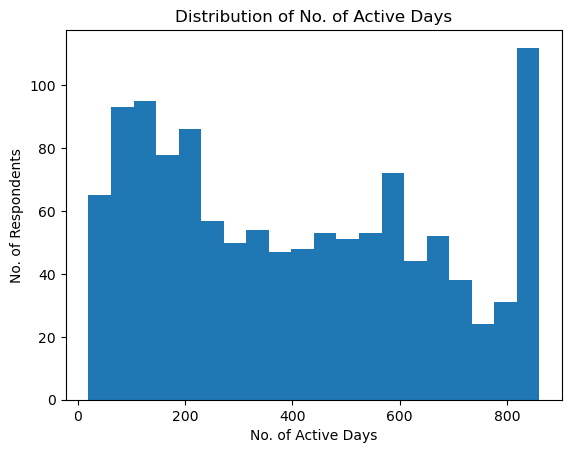

In [1278]:
plt.hist(df.days_active, bins=20)
plt.xlabel("No. of Active Days")
plt.ylabel("No. of Respondents")
plt.title("Distribution of No. of Active Days")

plt.show()

In [1279]:
asia_list = df[df['server'] == 'asia'].days_active.tolist()
euro_list = df[df['server'] == 'euro'].days_active.tolist()
usa_list = df[df['server'] == 'usa'].days_active.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')       

asia range: 21 - 860 mean: 417.0110864745011
euro range: 22 - 860 mean: 413.4848484848485
usa  range: 20 - 860 mean: 381.81748071979433
0.10260862601242378 no significant difference between server


<b>Level</b></br>
Adventure rank of the player<br>
Max is 60.

In [1280]:
df.level.describe()

count    1203.000000
mean       54.734830
std         6.714056
min         0.000000
25%        54.000000
50%        57.000000
75%        59.000000
max        60.000000
Name: level, dtype: float64

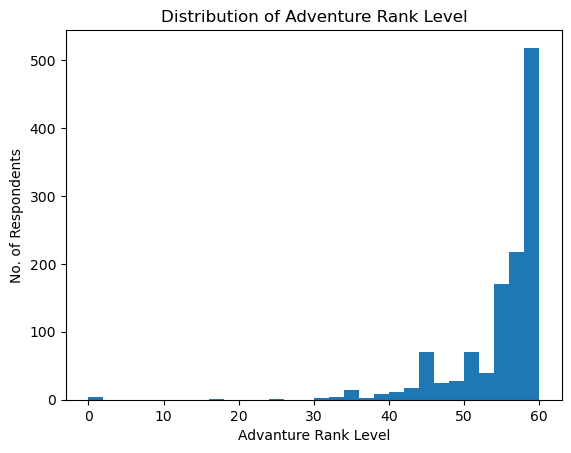

In [1281]:
plt.hist(df.level, bins=30)
plt.xlabel("Advanture Rank Level")
plt.ylabel("No. of Respondents")
plt.title("Distribution of Adventure Rank Level")
plt.show()

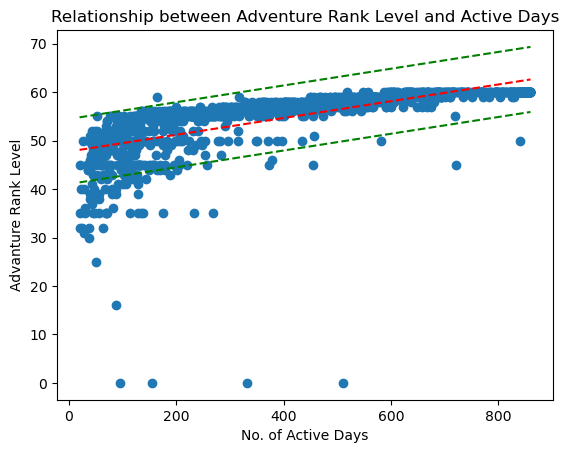

In [1282]:
df = df.sort_values(by=['days_active'])
x = df.days_active.tolist()
y = df.level.tolist()
plt.scatter(x, y)
plt.xlabel("No. of Active Days")
plt.ylabel("Advanture Rank Level")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.level.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.level.tolist()),"g--")
plt.title("Relationship between Adventure Rank Level and Active Days")
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  level   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     679.7
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          4.21e-198
Time:                        23:01:48   Log-Likelihood:                -3541.6
No. Observations:                1203   AIC:                             7089.
Df Residuals:                    1200   BIC:                             7105.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               17.8753      1.941  

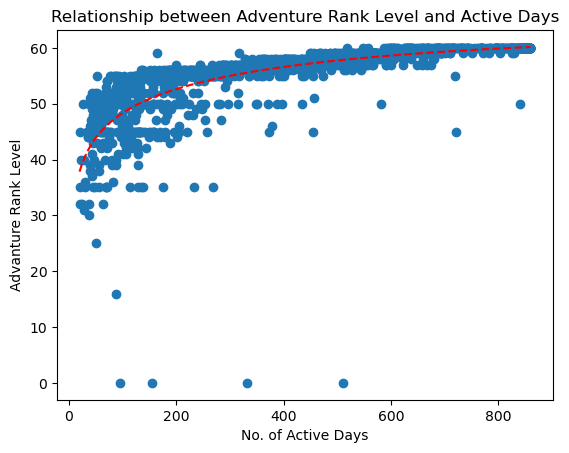

In [1283]:
#max model: df[['days_active','days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
df = df.sort_values(by=['days_active'])
y_sm = df.level
x_sm = df[['days_active','log(days_active)']]
x_sm = sm.add_constant(x_sm)
model = sm.OLS(y_sm, x_sm)
results = model.fit()
ypred = results.predict(x_sm)
print(results.summary())

plt.scatter(df.days_active, y_sm, label='data')
plt.plot(x,ypred,"r--")
plt.title("Relationship between Adventure Rank Level and Active Days")
plt.xlabel("No. of Active Days")
plt.ylabel("Advanture Rank Level")
plt.show()

In [1284]:
asia_list = df[df['server'] == 'asia'].level.tolist()
euro_list = df[df['server'] == 'euro'].level.tolist()
usa_list = df[df['server'] == 'usa'].level.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')  

asia range: 32 - 60 mean: 55.04212860310421
euro range: 0 - 60 mean: 54.92011019283746
usa  range: 0 - 60 mean: 54.20565552699229
0.16225990909571927 no significant difference between server


<b>Achievements</b></br>
No. of game achievements (i.e. required to complete certain activity in game)<br>
Max is 890.

In [1285]:
df.achievements.describe()

count    1203.000000
mean      542.795511
std       217.425321
min        78.000000
25%       351.500000
50%       551.000000
75%       734.500000
max       875.000000
Name: achievements, dtype: float64

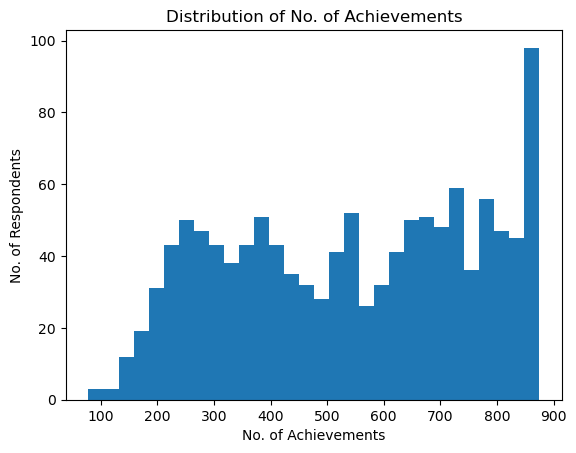

In [1286]:
plt.hist(df.achievements, bins=30)
plt.xlabel("No. of Achievements")
plt.ylabel("No. of Respondents")
plt.title("Distribution of No. of Achievements")
plt.show()

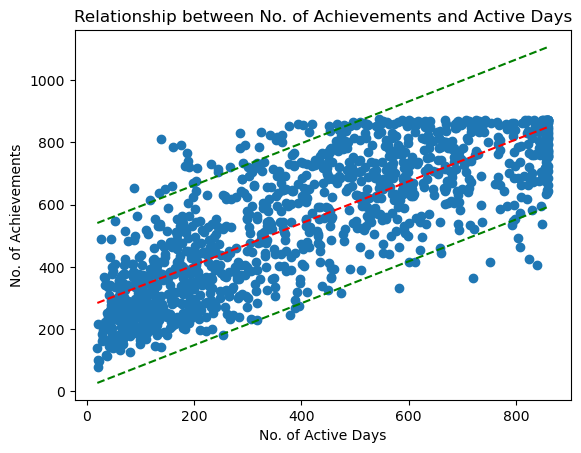

In [1287]:
x = df.days_active.tolist()
y = df.achievements.tolist()
plt.scatter(x, y)
plt.xlabel("No. of Active Days")
plt.ylabel("No. of Achievements")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.days_active.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.days_active.tolist()),"g--")
plt.title("Relationship between No. of Achievements and Active Days")
plt.show()

                            OLS Regression Results                            
Dep. Variable:           achievements   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     1091.
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          1.09e-270
Time:                        23:01:48   Log-Likelihood:                -7557.7
No. Observations:                1203   AIC:                         1.512e+04
Df Residuals:                    1200   BIC:                         1.514e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -397.5473     39.864  

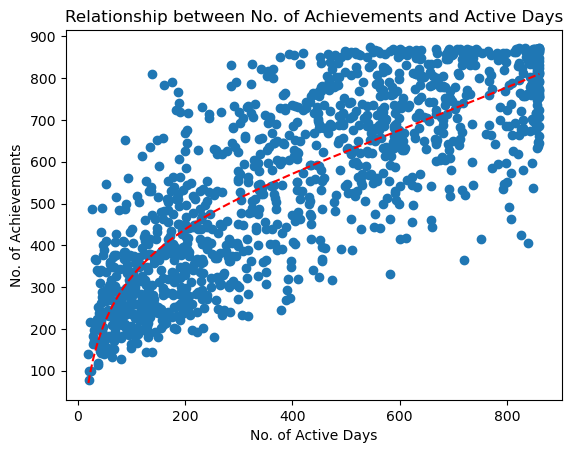

In [1288]:
# df[['days_active','days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
f = df.sort_values(by=['days_active'])
y_sm = df.achievements
x_sm = df[['days_active^2','log(days_active)']]
x_sm = sm.add_constant(x_sm)
model = sm.OLS(y_sm, x_sm)
results = model.fit()
ypred = results.predict(x_sm)
print(results.summary())

plt.scatter(df.days_active, y_sm, label='data')
plt.plot(x,ypred,"r--")
plt.title("Relationship between No. of Achievements and Active Days")
plt.xlabel("No. of Active Days")
plt.ylabel("No. of Achievements")
plt.show()

In [1289]:
asia_list = df[df['server'] == 'asia'].achievements.tolist()
euro_list = df[df['server'] == 'euro'].achievements.tolist()
usa_list = df[df['server'] == 'usa'].achievements.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')  

asia range: 100 - 872 mean: 543.9955654101996
euro range: 113 - 875 mean: 562.5537190082645
usa  range: 78 - 871 mean: 522.9665809768637
0.043878531328065316 significant difference between server


<b>Characters</b></br>
No. of characters the player has<br>
Max is 63.

In [1290]:
df.characters.describe()

count    1203.000000
mean       39.768911
std        10.627945
min         6.000000
25%        32.000000
50%        41.000000
75%        47.000000
max        63.000000
Name: characters, dtype: float64

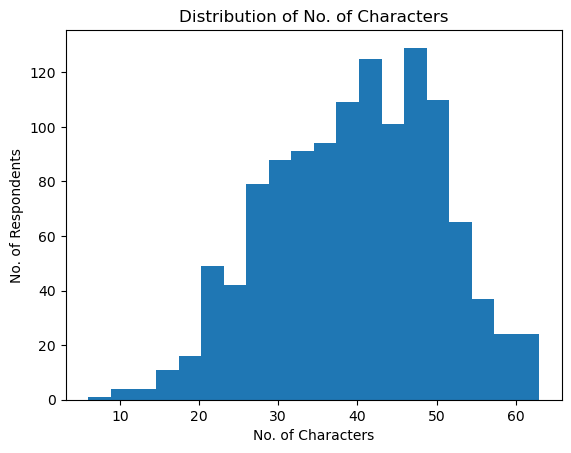

In [1291]:
plt.hist(df.characters, bins=20)
plt.xlabel("No. of Characters")
plt.ylabel("No. of Respondents")
plt.title("Distribution of No. of Characters")
plt.show()

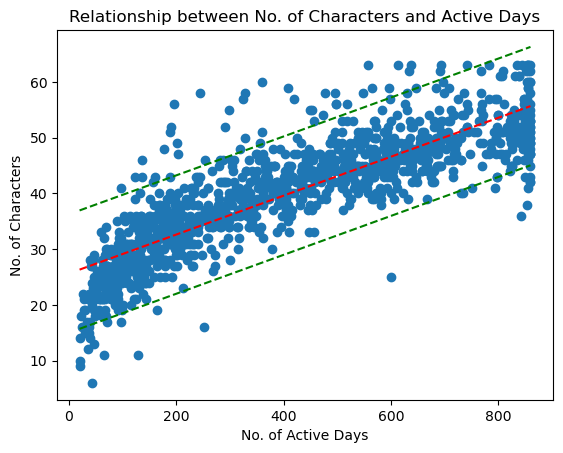

In [1292]:
x = df.days_active.tolist()
y = df.characters.tolist()
plt.scatter(x, y)
plt.xlabel("No. of Active Days")
plt.ylabel("No. of Characters")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.characters.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.characters.tolist()),"g--")
plt.title("Relationship between No. of Characters and Active Days")
plt.show()

                            OLS Regression Results                            
Dep. Variable:             characters   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     1967.
Date:                Fri, 03 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:01:48   Log-Likelihood:                -3675.5
No. Observations:                1203   AIC:                             7357.
Df Residuals:                    1200   BIC:                             7372.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -15.3776      1.582  

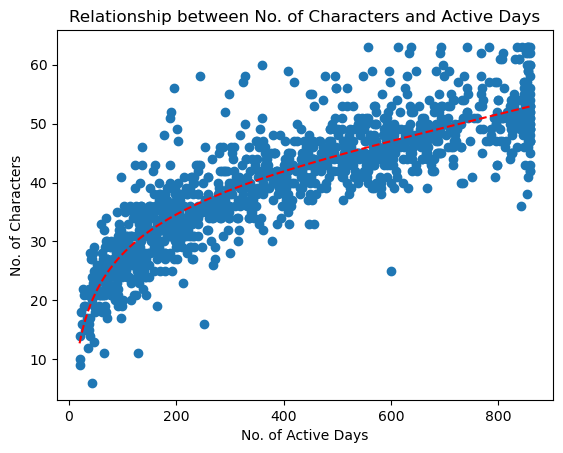

In [1293]:
# df[['days_active','days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
f = df.sort_values(by=['days_active'])
y_sm = df.characters
x_sm = df[['days_active^2','log(days_active)']]
x_sm = sm.add_constant(x_sm)
model = sm.OLS(y_sm, x_sm)
results = model.fit()
ypred = results.predict(x_sm)
print(results.summary())

plt.scatter(df.days_active, y_sm, label='data')
plt.plot(x,ypred,"r--")
plt.title("Relationship between No. of Characters and Active Days")
plt.xlabel("No. of Active Days")
plt.ylabel("No. of Characters")
plt.show()

In [1294]:
asia_list = df[df['server'] == 'asia'].characters.tolist()
euro_list = df[df['server'] == 'euro'].characters.tolist()
usa_list = df[df['server'] == 'usa'].characters.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server') 

asia range: 11 - 63 mean: 39.32150776053215
euro range: 6 - 63 mean: 39.917355371900825
usa  range: 9 - 63 mean: 40.149100257069406
0.5050106102824565 no significant difference between server


<b>Total no. of 5-Star Characters</b></br>
No. of 5-Star characters the player has in his/her showcase<br>
Max is 8.

In [1295]:
df.total_5_characters.describe()

count    1203.000000
mean        5.335827
std         2.331568
min         0.000000
25%         3.000000
50%         6.000000
75%         8.000000
max         8.000000
Name: total_5_characters, dtype: float64

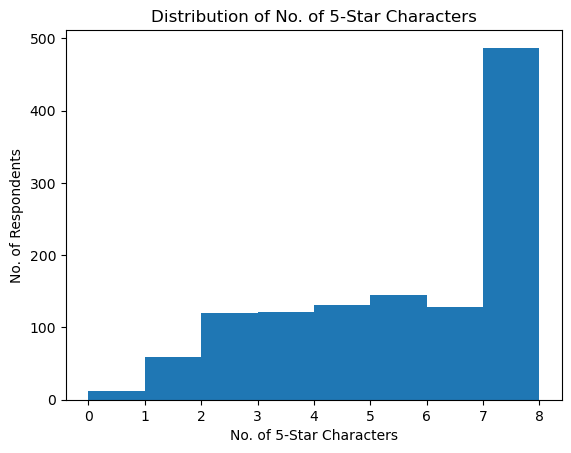

In [1296]:
plt.hist(df.total_5_characters, bins=8)
plt.xlabel("No. of 5-Star Characters")
plt.ylabel("No. of Respondents")
plt.title("Distribution of No. of 5-Star Characters")
plt.show()

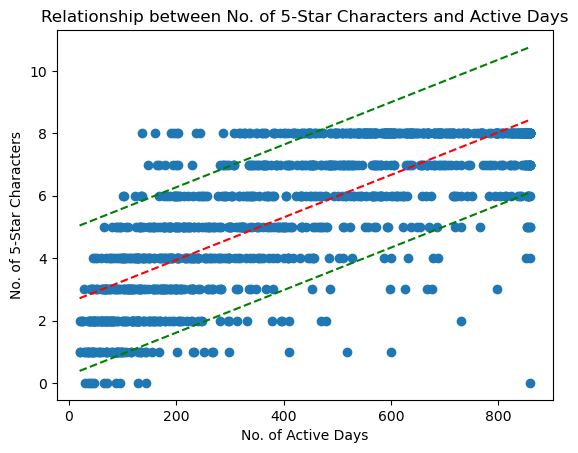

In [1297]:
x = df.days_active.tolist()
y = df.total_5_characters.tolist()
plt.scatter(x, y)
plt.xlabel("No. of Active Days")
plt.ylabel("No. of 5-Star Characters")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.total_5_characters.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.total_5_characters.tolist()),"g--")
plt.title("Relationship between No. of 5-Star Characters and Active Days")
plt.show()

                            OLS Regression Results                            
Dep. Variable:     total_5_characters   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     1017.
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          5.22e-259
Time:                        23:01:48   Log-Likelihood:                -2128.7
No. Observations:                1203   AIC:                             4263.
Df Residuals:                    1200   BIC:                             4279.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.2282      0.120     10.216

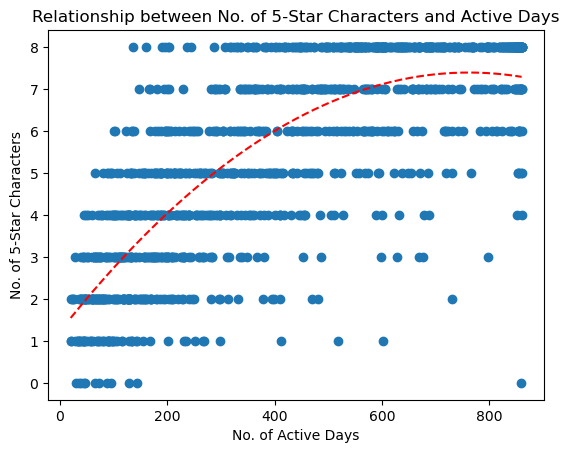

In [1298]:
# df[['days_active','days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
f = df.sort_values(by=['days_active'])
y_sm = df.total_5_characters
x_sm = df[['days_active','days_active^2']]
x_sm = sm.add_constant(x_sm)
model = sm.OLS(y_sm, x_sm)
results = model.fit()
ypred = results.predict(x_sm)
print(results.summary())

plt.scatter(df.days_active, y_sm, label='data')
plt.plot(x,ypred,"r--")
plt.title("Relationship between No. of 5-Star Characters and Active Days")
plt.xlabel("No. of Active Days")
plt.ylabel("No. of 5-Star Characters")
plt.show()

In [1299]:
asia_list = df[df['server'] == 'asia'].total_5_characters.tolist()
euro_list = df[df['server'] == 'euro'].total_5_characters.tolist()
usa_list = df[df['server'] == 'usa'].total_5_characters.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server') 

asia range: 0 - 8 mean: 5.339246119733924
euro range: 0 - 8 mean: 5.3911845730027546
usa  range: 0 - 8 mean: 5.280205655526992
0.8080180603857757 no significant difference between server


<b>Total no. of Constellations among 5-Star Characters</b></br>
No. of Constellations among 5-Star characters the player has in his/her showcase<br>
Max is 48.

In [1300]:
df.total_5_constellation.describe()

count    1203.000000
mean        2.762261
std         5.241585
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        48.000000
Name: total_5_constellation, dtype: float64

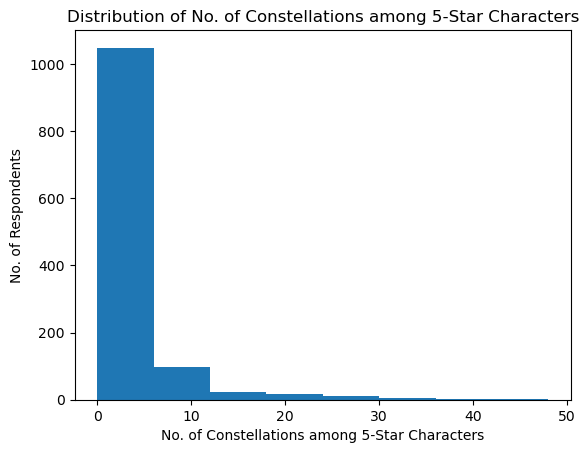

In [1301]:
plt.hist(df.total_5_constellation, bins=8)
plt.xlabel("No. of Constellations among 5-Star Characters")
plt.ylabel("No. of Respondents")
plt.title("Distribution of No. of Constellations among 5-Star Characters")
plt.show()

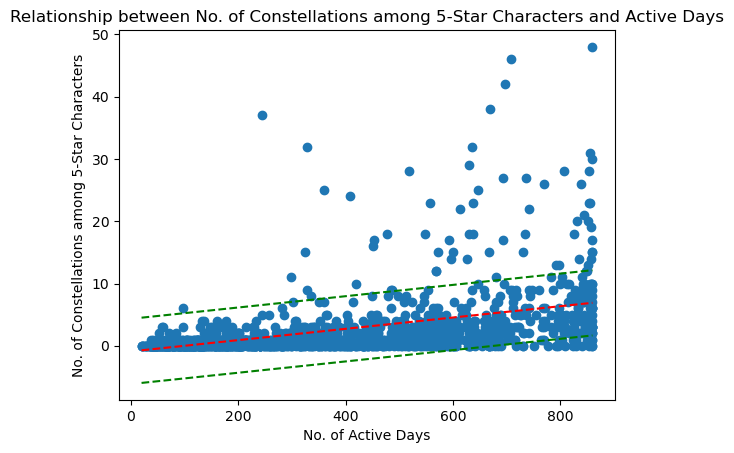

In [1302]:
x = df.days_active.tolist()
y = df.total_5_constellation.tolist()
plt.scatter(x, y)
plt.xlabel("No. of Active Days")
plt.ylabel("No. of Constellations among 5-Star Characters")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.total_5_constellation.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.total_5_constellation.tolist()),"g--")
plt.title("Relationship between No. of Constellations among 5-Star Characters and Active Days")
plt.show()

                              OLS Regression Results                             
Dep. Variable:     total_5_constellation   R-squared:                       0.198
Model:                               OLS   Adj. R-squared:                  0.197
Method:                    Least Squares   F-statistic:                     296.0
Date:                   Fri, 03 Mar 2023   Prob (F-statistic):           1.79e-59
Time:                           23:01:49   Log-Likelihood:                -3566.9
No. Observations:                   1203   AIC:                             7138.
Df Residuals:                       1201   BIC:                             7148.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.91

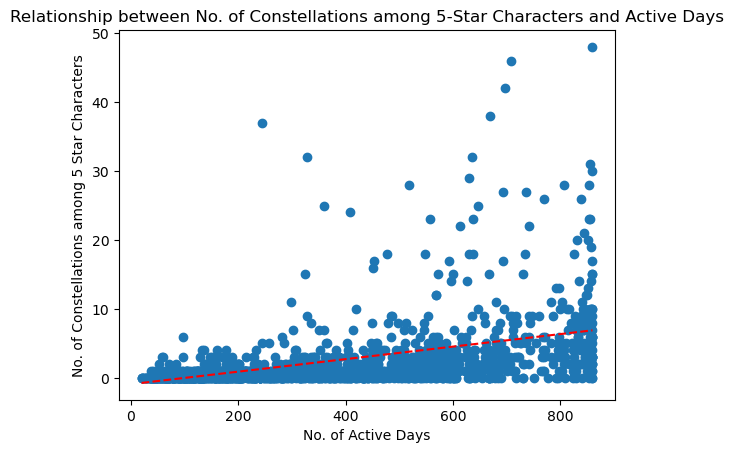

In [1303]:
# df[['days_active','days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
f = df.sort_values(by=['days_active'])
y_sm = df.total_5_constellation
x_sm = df[['days_active']]
x_sm = sm.add_constant(x_sm)
model = sm.OLS(y_sm, x_sm)
results = model.fit()
ypred = results.predict(x_sm)
print(results.summary())

plt.scatter(df.days_active, y_sm, label='data')
plt.plot(x,ypred,"r--")
plt.title("Relationship between No. of Constellations among 5-Star Characters and Active Days")
plt.xlabel("No. of Active Days")
plt.ylabel("No. of Constellations among 5 Star Characters")
plt.show()

In [1304]:
asia_list = df[df['server'] == 'asia'].total_5_constellation.tolist()
euro_list = df[df['server'] == 'euro'].total_5_constellation.tolist()
usa_list = df[df['server'] == 'usa'].total_5_constellation.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 0 - 42 mean: 2.563192904656319
euro range: 0 - 32 mean: 2.1818181818181817
usa  range: 0 - 48 mean: 3.5347043701799485
0.0011113838233427905 significant difference between server


<b>Total no. of 5-Star Weapons</b></br>
No. of 5-Star Weapons the player has in his/her showcase<br>
Max is 8.

In [1305]:
df.total_5_weapon.describe()

count    1203.000000
mean        2.113882
std         1.937329
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         8.000000
Name: total_5_weapon, dtype: float64

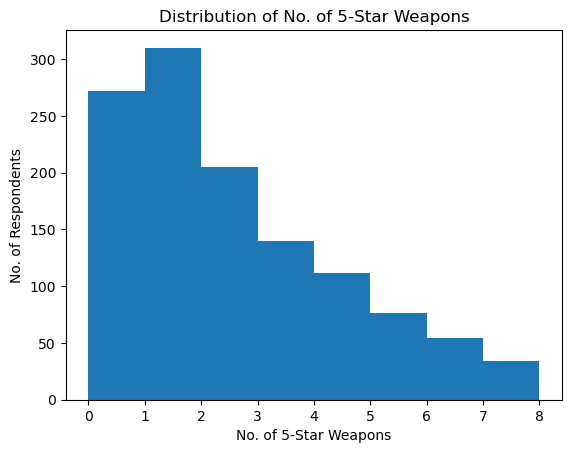

In [1306]:
plt.hist(df.total_5_weapon, bins=8)
plt.xlabel("No. of 5-Star Weapons")
plt.ylabel("No. of Respondents")
plt.title("Distribution of No. of 5-Star Weapons")
plt.show()

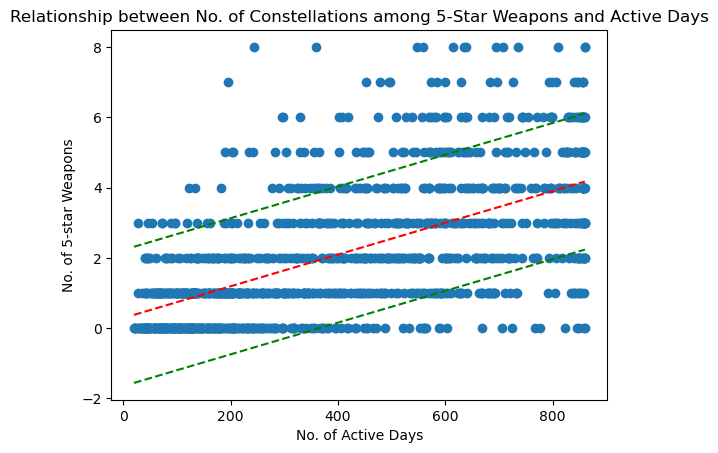

In [1307]:
x = df.days_active.tolist()
y = df.total_5_weapon.tolist()
plt.scatter(x, y)
plt.xlabel("No. of Active Days")
plt.ylabel("No. of 5-star Weapons")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.total_5_weapon.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.total_5_weapon.tolist()),"g--")
plt.title("Relationship between No. of Constellations among 5-Star Weapons and Active Days")
plt.show()

                            OLS Regression Results                            
Dep. Variable:         total_5_weapon   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     669.2
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          1.20e-117
Time:                        23:01:49   Log-Likelihood:                -2235.6
No. Observations:                1203   AIC:                             4475.
Df Residuals:                    1201   BIC:                             4485.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2876      0.084      3.440      

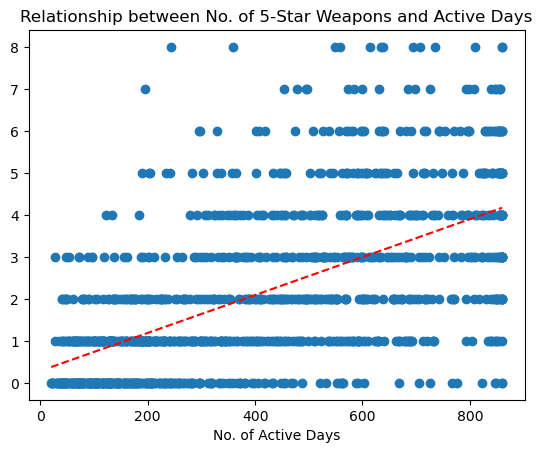

In [1308]:
# df[['days_active','days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
f = df.sort_values(by=['days_active'])
y_sm = df.total_5_weapon
x_sm = df[['days_active']]
x_sm = sm.add_constant(x_sm)
model = sm.OLS(y_sm, x_sm)
results = model.fit()
ypred = results.predict(x_sm)
print(results.summary())

plt.scatter(df.days_active, y_sm, label='data')
plt.plot(x,ypred,"r--")
plt.title("Relationship between No. of 5-Star Weapons and Active Days")
plt.xlabel("No. of Active Days")
plt.show()

In [1309]:
asia_list = df[df['server'] == 'asia'].total_5_weapon.tolist()
euro_list = df[df['server'] == 'euro'].total_5_weapon.tolist()
usa_list = df[df['server'] == 'usa'].total_5_weapon.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 0 - 8 mean: 2.1441241685144123
euro range: 0 - 8 mean: 1.9944903581267217
usa  range: 0 - 8 mean: 2.190231362467866
0.3515105848757237 no significant difference between server


<b>Total no. of Refinements among 5-Star Weapons</b></br>
No. of Refinements among 5-Star Weapons the player has in his/her showcase<br>
Max is 40.

In [1310]:
df.total_5_refinement.describe()

count    1203.000000
mean        2.486284
std         3.103394
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        37.000000
Name: total_5_refinement, dtype: float64

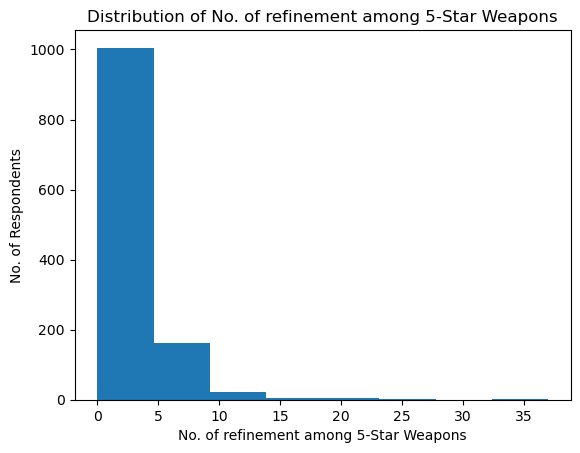

In [1311]:
plt.hist(df.total_5_refinement, bins=8)
plt.xlabel("No. of refinement among 5-Star Weapons")
plt.ylabel("No. of Respondents")
plt.title("Distribution of No. of refinement among 5-Star Weapons")
plt.show()

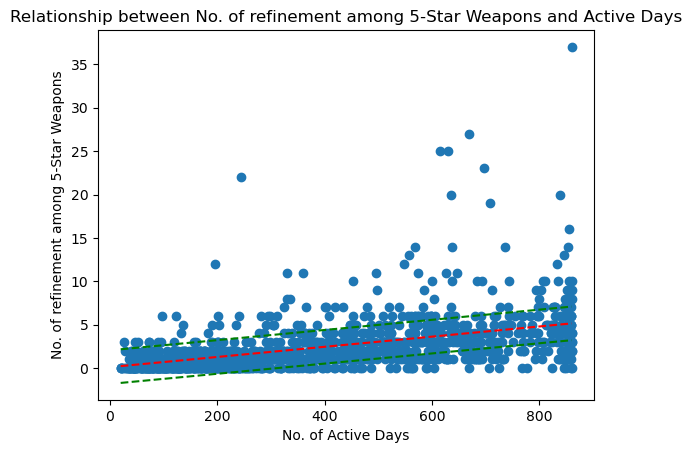

In [1312]:
x = df.days_active.tolist()
y = df.total_5_refinement.tolist()
plt.scatter(x, y)
plt.xlabel("No. of Active Days")
plt.ylabel("No. of refinement among 5-Star Weapons")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.total_5_weapon.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.total_5_weapon.tolist()),"g--")
plt.title("Relationship between No. of refinement among 5-Star Weapons and Active Days")
plt.show()

                            OLS Regression Results                            
Dep. Variable:     total_5_refinement   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     368.1
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           8.83e-72
Time:                        23:01:49   Log-Likelihood:                -2908.0
No. Observations:                1203   AIC:                             5820.
Df Residuals:                    1201   BIC:                             5830.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1174      0.146      0.803      

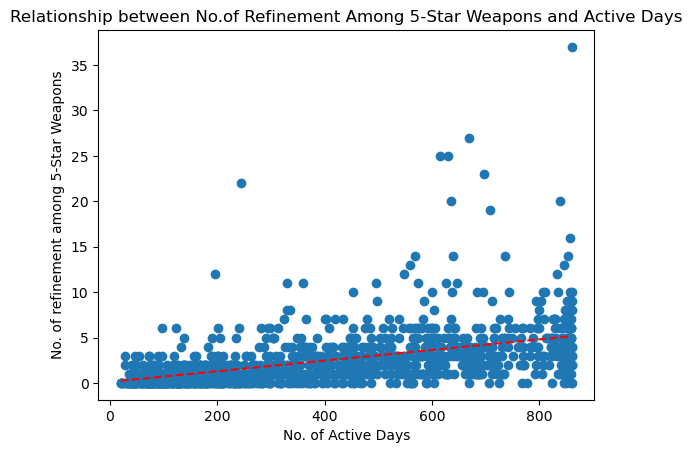

In [1313]:
# df[['days_active','days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
f = df.sort_values(by=['days_active'])
y_sm = df.total_5_refinement
x_sm = df[['days_active']]
x_sm = sm.add_constant(x_sm)
model = sm.OLS(y_sm, x_sm)
results = model.fit()
ypred = results.predict(x_sm)
print(results.summary())

plt.scatter(df.days_active, y_sm, label='data')
plt.plot(x,ypred,"r--")
plt.title("Relationship between No.of Refinement Among 5-Star Weapons and Active Days")
plt.xlabel("No. of Active Days")
plt.ylabel("No. of refinement among 5-Star Weapons")
plt.show()

In [1314]:
asia_list = df[df['server'] == 'asia'].total_5_refinement.tolist()
euro_list = df[df['server'] == 'euro'].total_5_refinement.tolist()
usa_list = df[df['server'] == 'usa'].total_5_refinement.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 0 - 27 mean: 2.4789356984478936
euro range: 0 - 20 mean: 2.184573002754821
usa  range: 0 - 37 mean: 2.776349614395887
0.032713636827219214 significant difference between server


<b>Total Exploration</b><br>
Total exploration score on Genshin Map<br>
Max is below 7,000.

In [1315]:
df.total_explored.describe()

count    1203.000000
mean     4752.295096
std      1932.991029
min       607.000000
25%      2945.000000
50%      5173.000000
75%      6660.500000
max      6930.000000
Name: total_explored, dtype: float64

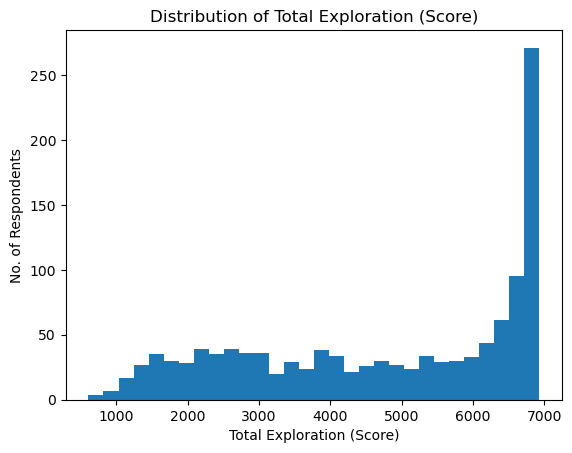

In [1316]:
plt.hist(df.total_explored, bins=30)
plt.xlabel("Total Exploration Score")
plt.ylabel("No. of Respondents")
plt.title("Distribution of Total Exploration Score")
plt.show()

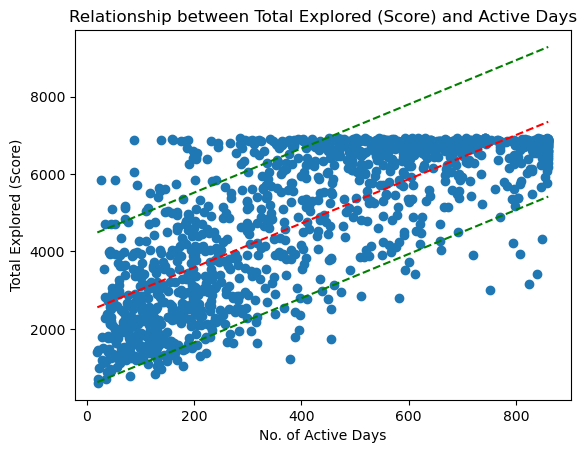

In [1317]:
x = df.days_active.tolist()
y = df.total_explored.tolist()
plt.scatter(x, y)
plt.xlabel("No. of Active Days")
plt.ylabel("Total Exploration Score")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.total_explored.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.total_explored.tolist()),"g--")
plt.title("Relationship between Total Exploration Score and Active Days")
plt.show()

                            OLS Regression Results                            
Dep. Variable:         total_explored   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     634.9
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          4.99e-247
Time:                        23:04:20   Log-Likelihood:                -10237.
No. Observations:                1203   AIC:                         2.048e+04
Df Residuals:                    1199   BIC:                         2.050e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.861e+06 

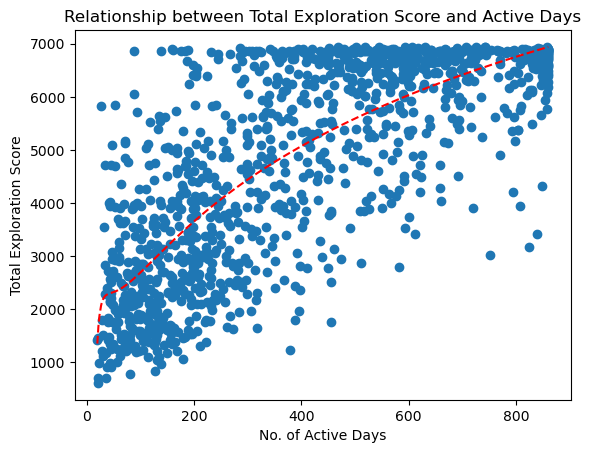

In [1445]:
# df[['days_active','days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
f = df.sort_values(by=['days_active'])
y_sm = df.total_explored
x_sm = df[['1/days_active','log(days_active)','sigmoid(days_active)']]
x_sm = sm.add_constant(x_sm)
model = sm.OLS(y_sm, x_sm)
results = model.fit()
ypred = results.predict(x_sm)
print(results.summary())

plt.scatter(df.days_active, y_sm, label='data')
plt.plot(x,ypred,"r--")
plt.title("Relationship between Total Exploration Score and Active Days")
plt.xlabel("No. of Active Days")
plt.ylabel("Total Exploration Score")
plt.show()

In [1319]:
asia_list = df[df['server'] == 'asia'].total_explored.tolist()
euro_list = df[df['server'] == 'euro'].total_explored.tolist()
usa_list = df[df['server'] == 'usa'].total_explored.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 698 - 6930 mean: 4709.689578713969
euro range: 701 - 6930 mean: 4950.382920110193
usa  range: 607 - 6930 mean: 4616.843187660668
0.05114637508877799 no significant difference between server


<b>Oculi</b><br>
Total number of Oculi collected in the game.<br>
Max is 613.

In [1320]:
df.culi.describe()

count    1203.000000
mean      423.036575
std       170.657865
min        18.000000
25%       278.500000
50%       461.000000
75%       588.000000
max       613.000000
Name: culi, dtype: float64

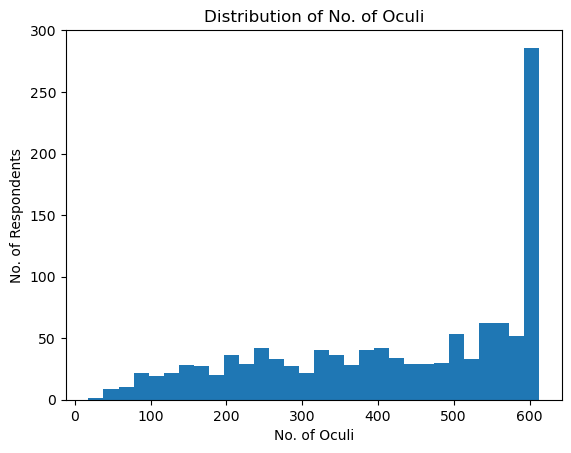

In [1321]:
plt.hist(df.culi, bins=30)
plt.xlabel("No. of Oculi")
plt.ylabel("No. of Respondents")
plt.title("Distribution of No. of Oculi")
plt.show()

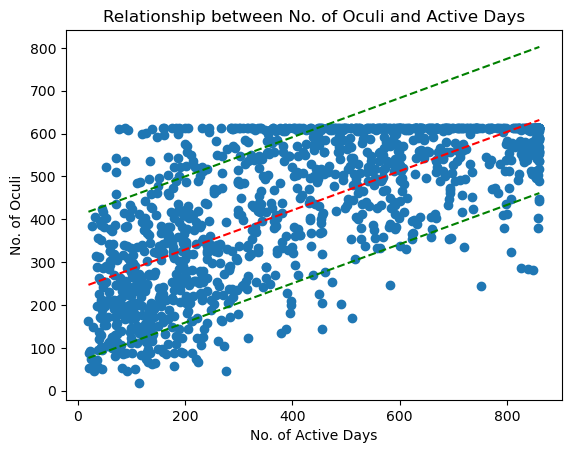

In [1322]:
x = df.days_active.tolist()
y = df.culi.tolist()
plt.scatter(x, y)
plt.xlabel("No. of Active Days")
plt.ylabel("No. of Oculi")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.culi.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.culi.tolist()),"g--")
plt.title("Relationship between No. of Oculi and Active Days")
plt.show()

                            OLS Regression Results                            
Dep. Variable:                   culi   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     628.3
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          2.04e-187
Time:                        23:01:50   Log-Likelihood:                -7458.6
No. Observations:                1203   AIC:                         1.492e+04
Df Residuals:                    1200   BIC:                         1.494e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 6862.2656 

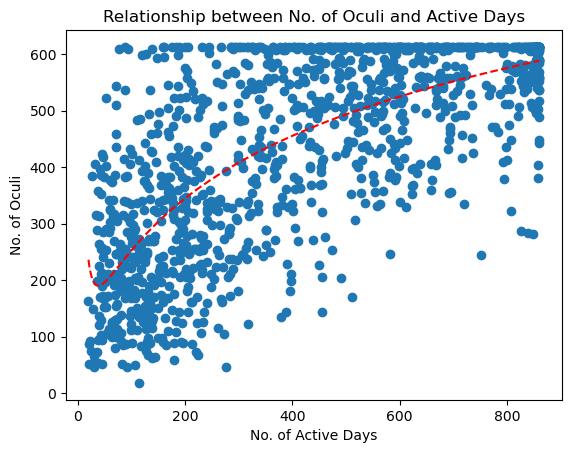

In [1323]:
# df[['days_active','days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
f = df.sort_values(by=['days_active'])
y_sm = df.culi
x_sm = df[['log(days_active)','sigmoid(days_active)']]
x_sm = sm.add_constant(x_sm)
model = sm.OLS(y_sm, x_sm)
results = model.fit()
ypred = results.predict(x_sm)
print(results.summary())

plt.scatter(df.days_active, y_sm, label='data')
plt.plot(x,ypred,"r--")
plt.title("Relationship between No. of Oculi and Active Days")
plt.xlabel("No. of Active Days")
plt.ylabel("No. of Oculi")
plt.show()

In [1324]:
asia_list = df[df['server'] == 'asia'].culi.tolist()
euro_list = df[df['server'] == 'euro'].culi.tolist()
usa_list = df[df['server'] == 'usa'].culi.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 46 - 613 mean: 419.3392461197339
euro range: 18 - 613 mean: 438.3333333333333
usa  range: 46 - 613 mean: 413.0488431876607
0.10745438917062827 no significant difference between server


<b>Chests, waypoints and domains in open world</b><br>
- Common Chests<br>
- Exquisite Chests<br>
- Precious Chests<br>
- Luxurious Chests<br>
- Remarkable Chests<br>
- Unlocked Waypoints<br>
- Unlocked Domains

In [1325]:
df.common_chests.describe()

count    1203.000000
mean     1296.145470
std       758.790635
min        81.000000
25%       544.000000
50%      1291.000000
75%      2031.500000
max      2526.000000
Name: common_chests, dtype: float64

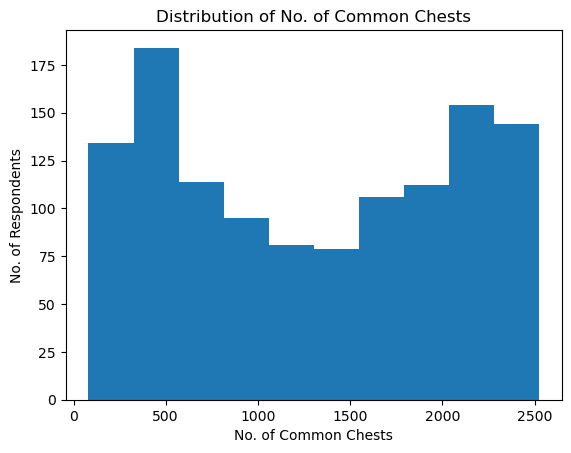

In [1326]:
plt.hist(df.common_chests, bins=10)
plt.xlabel("No. of Common Chests")
plt.ylabel("No. of Respondents")
plt.title("Distribution of No. of Common Chests")
plt.show()

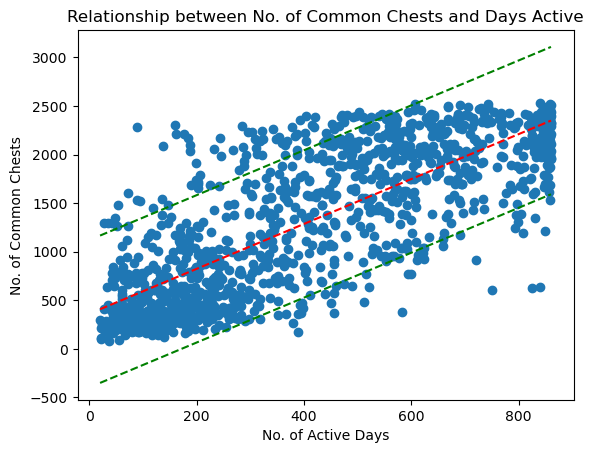

In [1327]:
x = df.days_active.tolist()
y = df.common_chests.tolist()
plt.scatter(x, y)
plt.xlabel("No. of Active Days")
plt.ylabel("No. of Common Chests")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.common_chests.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.common_chests.tolist()),"g--")
plt.title("Relationship between No. of Common Chests and Days Active")
plt.xlabel("No. of Active Days")
plt.show()

                            OLS Regression Results                            
Dep. Variable:          common_chests   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     680.9
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          2.49e-258
Time:                        23:01:50   Log-Likelihood:                -9086.2
No. Observations:                1203   AIC:                         1.818e+04
Df Residuals:                    1199   BIC:                         1.820e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.735e+06 

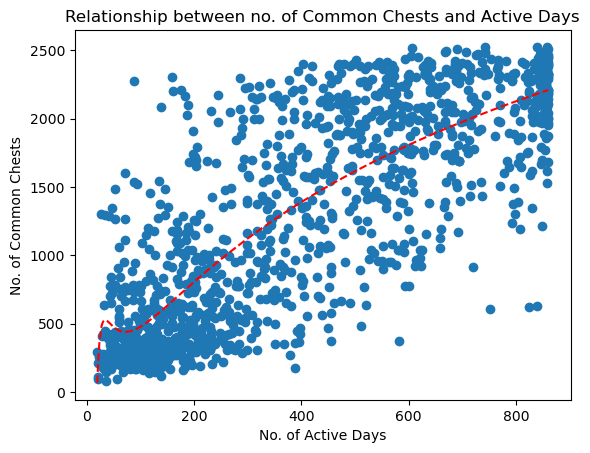

In [1328]:
# df[['days_active','days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
f = df.sort_values(by=['days_active'])
y_sm = df.common_chests
x_sm = df[['1/days_active','log(days_active)','sigmoid(days_active)']]
x_sm = sm.add_constant(x_sm)
model = sm.OLS(y_sm, x_sm)
results = model.fit()
ypred = results.predict(x_sm)
print(results.summary())

plt.scatter(df.days_active, y_sm, label='data')
plt.plot(x,ypred,"r--")
plt.title("Relationship between no. of Common Chests and Active Days")
plt.xlabel("No. of Active Days")
plt.ylabel("No. of Common Chests")
plt.show()

In [1329]:
asia_list = df[df['server'] == 'asia'].common_chests.tolist()
euro_list = df[df['server'] == 'euro'].common_chests.tolist()
usa_list = df[df['server'] == 'usa'].common_chests.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 110 - 2526 mean: 1280.5764966740576
euro range: 81 - 2525 mean: 1378.0192837465565
usa  range: 92 - 2489 mean: 1237.7943444730076
0.0346636526746264 significant difference between server


In [1330]:
df.exquisite_chests.describe()

count    1203.000000
mean      914.184539
std       459.664067
min        64.000000
25%       461.000000
50%       967.000000
75%      1350.000000
max      1588.000000
Name: exquisite_chests, dtype: float64

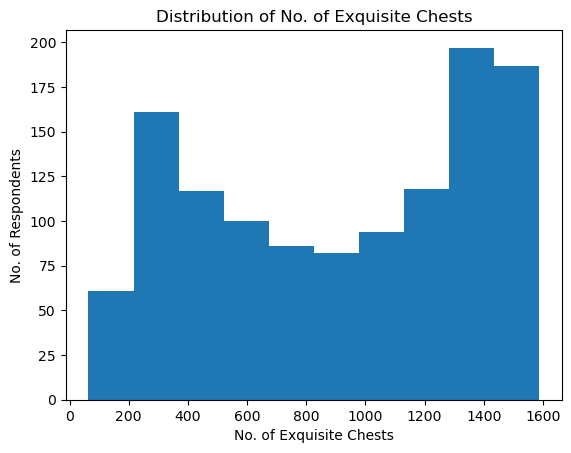

In [1331]:
plt.hist(df.exquisite_chests, bins=10)
plt.xlabel("No. of Exquisite Chests")
plt.ylabel("No. of Respondents")
plt.title("Distribution of No. of Exquisite Chests")
plt.show()

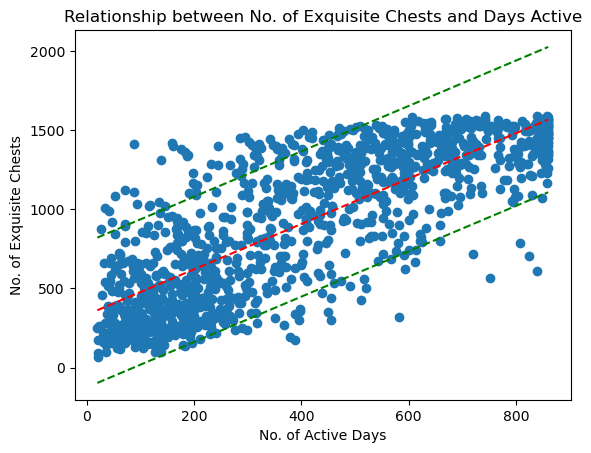

In [1332]:
x = df.days_active.tolist()
y = df.exquisite_chests.tolist()
plt.scatter(x, y)
plt.xlabel("No. of Active Days")
plt.ylabel("No. of Exquisite Chests")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.exquisite_chests.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.exquisite_chests.tolist()),"g--")
plt.title("Relationship between No. of Exquisite Chests and Days Active")
plt.show()

                            OLS Regression Results                            
Dep. Variable:       exquisite_chests   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     789.7
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          2.68e-283
Time:                        23:01:50   Log-Likelihood:                -8425.5
No. Observations:                1203   AIC:                         1.686e+04
Df Residuals:                    1199   BIC:                         1.688e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  1.11e+06 

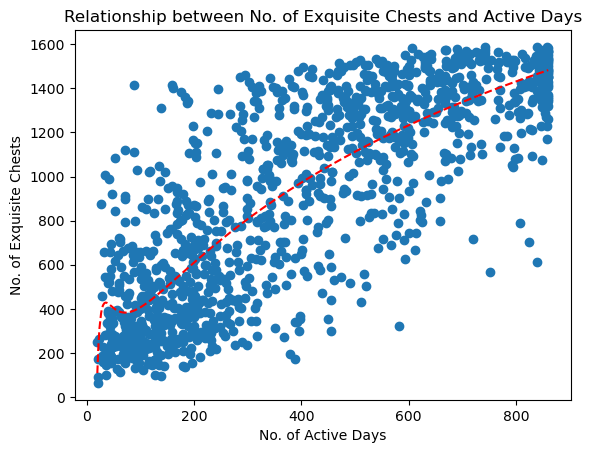

In [1333]:
# df[['days_active','days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
f = df.sort_values(by=['days_active'])
y_sm = df.exquisite_chests
x_sm = df[['1/days_active','log(days_active)','sigmoid(days_active)']]
x_sm = sm.add_constant(x_sm)
model = sm.OLS(y_sm, x_sm)
results = model.fit()
ypred = results.predict(x_sm)
print(results.summary())

plt.scatter(df.days_active, y_sm, label='data')
plt.plot(x,ypred,"r--")
plt.title("Relationship between No. of Exquisite Chests and Active Days")
plt.xlabel("No. of Active Days")
plt.ylabel("No. of Exquisite Chests")
plt.show()

In [1334]:
df.precious_chests.describe()

count    1203.000000
mean      278.233583
std       135.178791
min        27.000000
25%       151.000000
50%       281.000000
75%       403.000000
max       486.000000
Name: precious_chests, dtype: float64

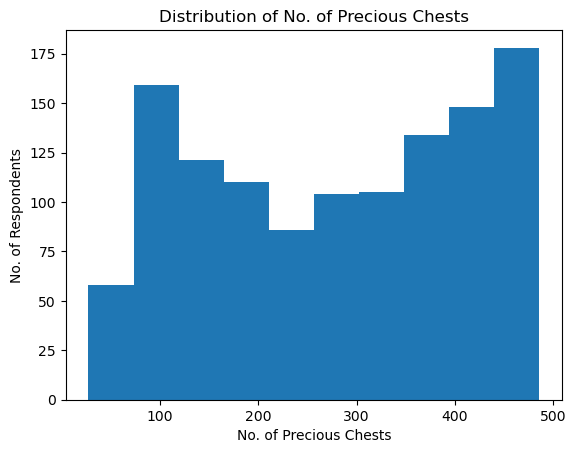

In [1335]:
plt.hist(df.precious_chests, bins=10)
plt.xlabel("No. of Precious Chests")
plt.ylabel("No. of Respondents")
plt.title("Distribution of No. of Precious Chests")
plt.show()

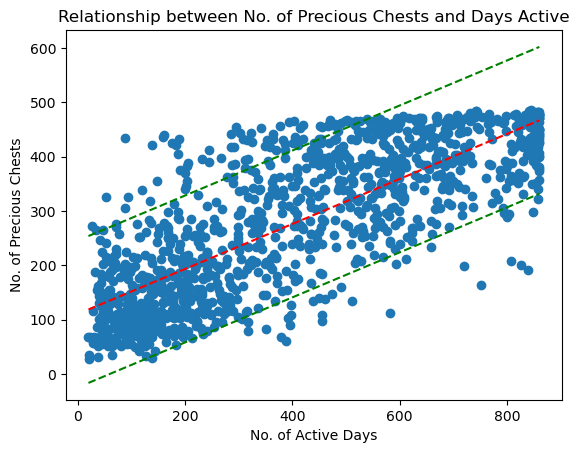

In [1336]:
x = df.days_active.tolist()
y = df.precious_chests.tolist()
plt.scatter(x, y)
plt.xlabel("No. of Active Days")
plt.ylabel("No. of Precious Chests")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.precious_chests.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.precious_chests.tolist()),"g--")
plt.title("Relationship between No. of Precious Chests and Days Active")
plt.show()

                            OLS Regression Results                            
Dep. Variable:        precious_chests   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     711.5
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          1.30e-265
Time:                        23:01:50   Log-Likelihood:                -6994.1
No. Observations:                1203   AIC:                         1.400e+04
Df Residuals:                    1199   BIC:                         1.402e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3.072e+05 

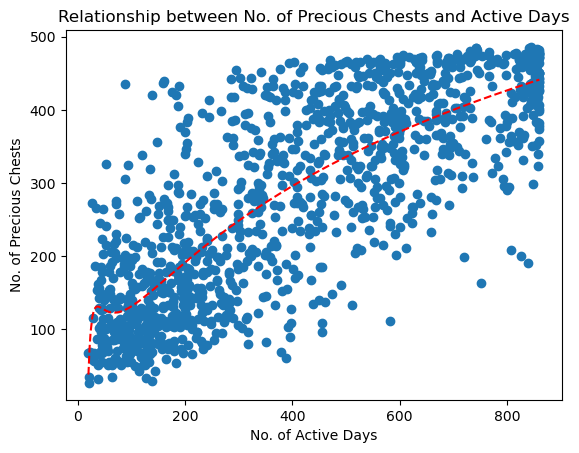

In [1337]:
# df[['days_active','days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
f = df.sort_values(by=['days_active'])
y_sm = df.precious_chests
x_sm = df[['1/days_active','log(days_active)','sigmoid(days_active)']]
x_sm = sm.add_constant(x_sm)
model = sm.OLS(y_sm, x_sm)
results = model.fit()
ypred = results.predict(x_sm)
print(results.summary())

plt.scatter(df.days_active, y_sm, label='data')
plt.plot(x,ypred,"r--")
plt.title("Relationship between No. of Precious Chests and Active Days")
plt.xlabel("No. of Active Days")
plt.ylabel("No. of Precious Chests")
plt.show()

In [1338]:
asia_list = df[df['server'] == 'asia'].precious_chests.tolist()
euro_list = df[df['server'] == 'euro'].precious_chests.tolist()
usa_list = df[df['server'] == 'usa'].precious_chests.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 34 - 486 mean: 279.1086474501109
euro range: 32 - 484 mean: 291.3801652892562
usa  range: 27 - 484 mean: 264.9511568123393
0.027084810460129387 significant difference between server


In [1339]:
df.luxurious_chests.describe()

count    1203.000000
mean      109.562760
std        50.815594
min        10.000000
25%        63.000000
50%       114.000000
75%       158.000000
max       186.000000
Name: luxurious_chests, dtype: float64

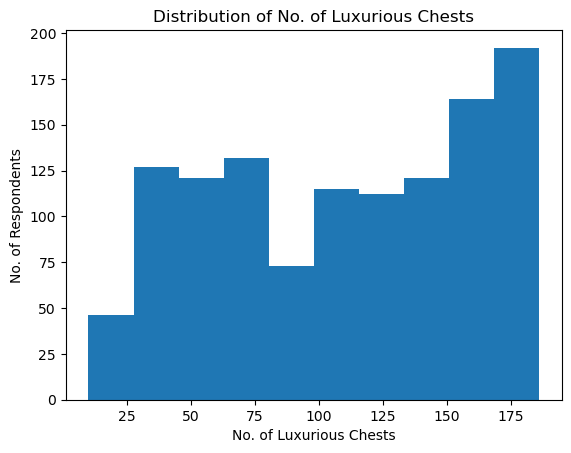

In [1340]:
plt.hist(df.luxurious_chests, bins=10)
plt.xlabel("No. of Luxurious Chests")
plt.ylabel("No. of Respondents")
plt.title("Distribution of No. of Luxurious Chests")
plt.show()

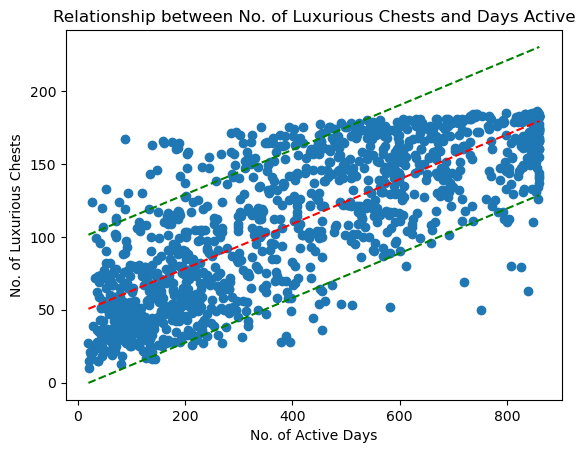

In [1341]:
x = df.days_active.tolist()
y = df.luxurious_chests.tolist()
plt.scatter(x, y)
plt.xlabel("No. of Active Days")
plt.ylabel("No. of Luxurious Chests")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.luxurious_chests.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.luxurious_chests.tolist()),"g--")
plt.title("Relationship between No. of Luxurious Chests and Days Active")
plt.xlabel("No. of Active Days")
plt.show()

                            OLS Regression Results                            
Dep. Variable:       luxurious_chests   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     659.7
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          3.51e-253
Time:                        23:01:51   Log-Likelihood:                -5845.8
No. Observations:                1203   AIC:                         1.170e+04
Df Residuals:                    1199   BIC:                         1.172e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.159e+05 

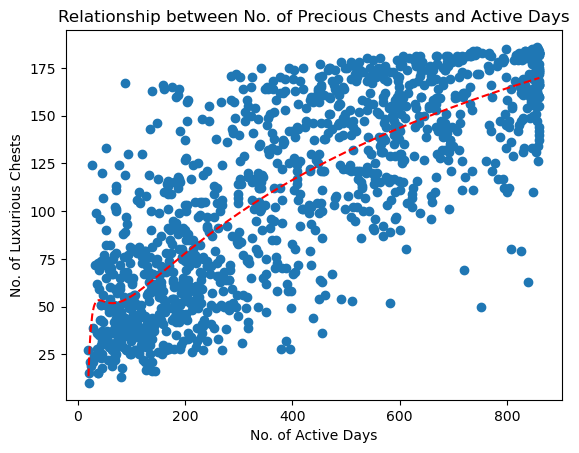

In [1342]:
# df[['days_active','days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
f = df.sort_values(by=['days_active'])
y_sm = df.luxurious_chests
x_sm = df[['1/days_active','log(days_active)','sigmoid(days_active)']]
x_sm = sm.add_constant(x_sm)
model = sm.OLS(y_sm, x_sm)
results = model.fit()
ypred = results.predict(x_sm)
print(results.summary())

plt.scatter(df.days_active, y_sm, label='data')
plt.plot(x,ypred,"r--")
plt.title("Relationship between No. of Precious Chests and Active Days")
plt.xlabel("No. of Active Days")
plt.ylabel("No. of Luxurious Chests")
plt.show()

In [1343]:
asia_list = df[df['server'] == 'asia'].luxurious_chests.tolist()
euro_list = df[df['server'] == 'euro'].luxurious_chests.tolist()
usa_list = df[df['server'] == 'usa'].luxurious_chests.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 15 - 185 mean: 109.71175166297118
euro range: 15 - 186 mean: 114.633608815427
usa  range: 10 - 184 mean: 104.65809768637533
0.026618587303324396 significant difference between server


In [1344]:
df.remarkable_chests.describe()

count    1203.000000
mean       63.924356
std        51.936398
min         0.000000
25%        12.000000
50%        56.000000
75%       115.500000
max       146.000000
Name: remarkable_chests, dtype: float64

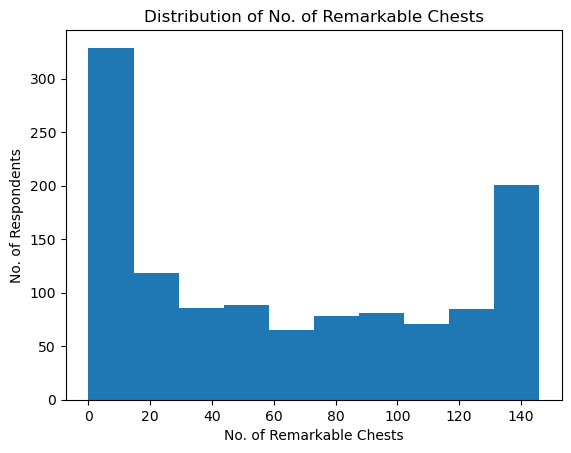

In [1345]:
plt.hist(df.remarkable_chests, bins=10)
plt.xlabel("No. of Remarkable Chests")
plt.ylabel("No. of Respondents")
plt.title("Distribution of No. of Remarkable Chests")
plt.show()

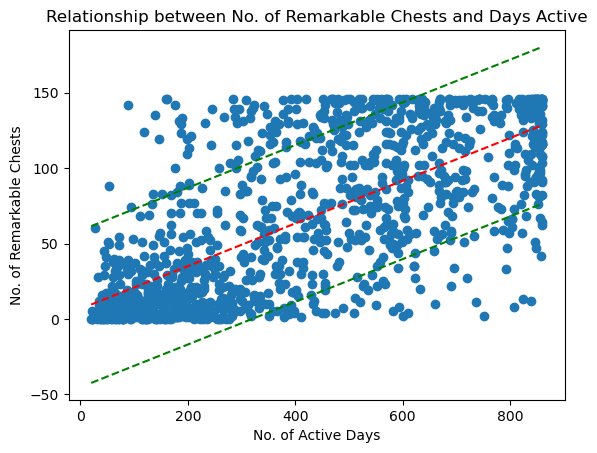

In [1346]:
x = df.days_active.tolist()
y = df.remarkable_chests.tolist()
plt.scatter(x, y)
plt.xlabel("No. of Active Days")
plt.ylabel("No. of Remarkable Chests")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.remarkable_chests.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.remarkable_chests.tolist()),"g--")
plt.title("Relationship between No. of Remarkable Chests and Days Active")
plt.xlabel("No. of Active Days")
plt.show()

                            OLS Regression Results                            
Dep. Variable:      remarkable_chests   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     405.6
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          8.22e-182
Time:                        23:01:51   Log-Likelihood:                -6037.0
No. Observations:                1203   AIC:                         1.208e+04
Df Residuals:                    1199   BIC:                         1.210e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 9.451e+04 

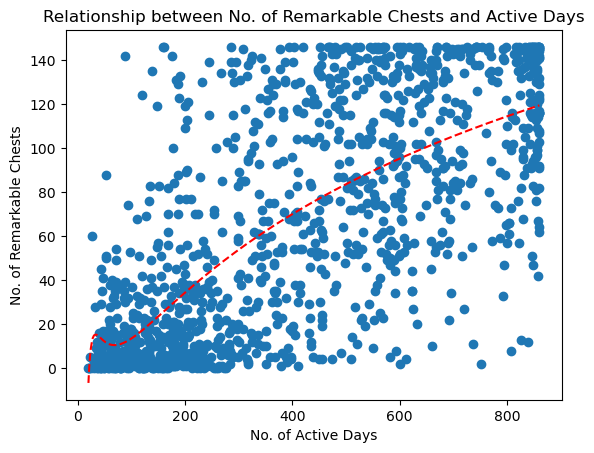

In [1347]:
# df[['days_active','days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
f = df.sort_values(by=['days_active'])
y_sm = df.remarkable_chests
x_sm = df[['1/days_active','log(days_active)','sigmoid(days_active)']]
x_sm = sm.add_constant(x_sm)
model = sm.OLS(y_sm, x_sm)
results = model.fit()
ypred = results.predict(x_sm)
print(results.summary())

plt.scatter(df.days_active, y_sm, label='data')
plt.plot(x,ypred,"r--")
plt.title("Relationship between No. of Remarkable Chests and Active Days")
plt.xlabel("No. of Active Days")
plt.ylabel("No. of Remarkable Chests")
plt.show()

In [1348]:
asia_list = df[df['server'] == 'asia'].remarkable_chests.tolist()
euro_list = df[df['server'] == 'euro'].remarkable_chests.tolist()
usa_list = df[df['server'] == 'usa'].remarkable_chests.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 0 - 146 mean: 62.97560975609756
euro range: 0 - 146 mean: 69.98898071625344
usa  range: 0 - 146 mean: 59.365038560411314
0.0173198071787413 significant difference between server


In [1349]:
df.unlocked_waypoints.describe()

count    1203.000000
mean      246.875312
std        46.514622
min        71.000000
25%       224.000000
50%       265.000000
75%       286.000000
max       295.000000
Name: unlocked_waypoints, dtype: float64

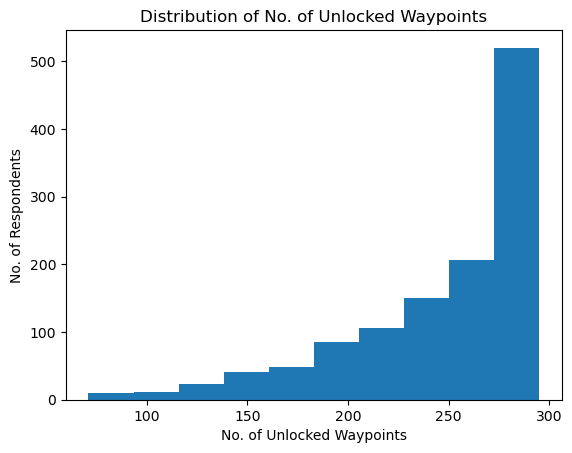

In [1350]:
plt.hist(df.unlocked_waypoints, bins=10)
plt.xlabel("No. of Unlocked Waypoints")
plt.ylabel("No. of Respondents")
plt.title("Distribution of No. of Unlocked Waypoints")
plt.show()

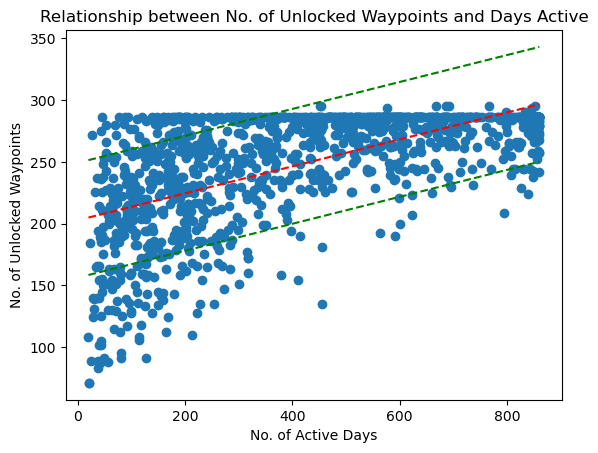

In [1351]:
x = df.days_active.tolist()
y = df.unlocked_waypoints.tolist()
plt.scatter(x, y)
plt.xlabel("No. of Active Days")
plt.ylabel("No. of Unlocked Waypoints")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.unlocked_waypoints.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.unlocked_waypoints.tolist()),"g--")
plt.title("Relationship between No. of Unlocked Waypoints and Days Active")
plt.show()

                            OLS Regression Results                            
Dep. Variable:     unlocked_waypoints   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     247.1
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          8.61e-155
Time:                        23:01:51   Log-Likelihood:                -5963.9
No. Observations:                1203   AIC:                         1.194e+04
Df Residuals:                    1198   BIC:                         1.196e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.093e+05 

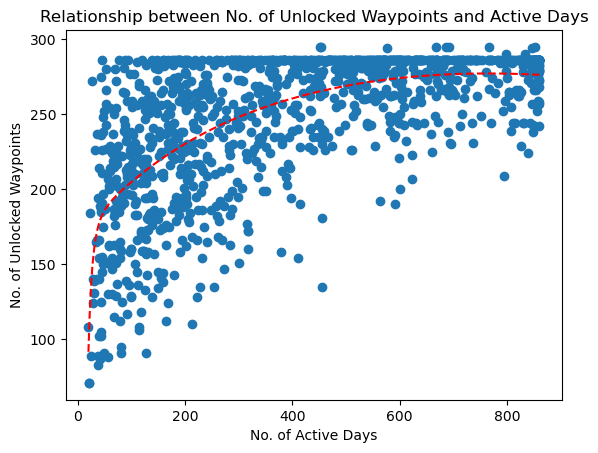

In [1352]:
# df[['days_active','days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
f = df.sort_values(by=['days_active'])
y_sm = df.unlocked_waypoints
x_sm = df[['days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
x_sm = sm.add_constant(x_sm)
model = sm.OLS(y_sm, x_sm)
results = model.fit()
ypred = results.predict(x_sm)
print(results.summary())

plt.scatter(df.days_active, y_sm, label='data')
plt.plot(x,ypred,"r--")
plt.title("Relationship between No. of Unlocked Waypoints and Active Days")
plt.xlabel("No. of Active Days")
plt.ylabel("No. of Unlocked Waypoints")
plt.show()

In [1353]:
asia_list = df[df['server'] == 'asia'].unlocked_waypoints.tolist()
euro_list = df[df['server'] == 'euro'].unlocked_waypoints.tolist()
usa_list = df[df['server'] == 'usa'].unlocked_waypoints.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 71 - 295 mean: 246.9889135254989
euro range: 83 - 295 mean: 249.87052341597797
usa  range: 71 - 295 mean: 243.94858611825194
0.21798125499278467 no significant difference between server


In [1354]:
df.unlocked_domains.describe()

count    1203.000000
mean       40.073150
std         7.971641
min        14.000000
25%        35.000000
50%        43.000000
75%        46.000000
max        49.000000
Name: unlocked_domains, dtype: float64

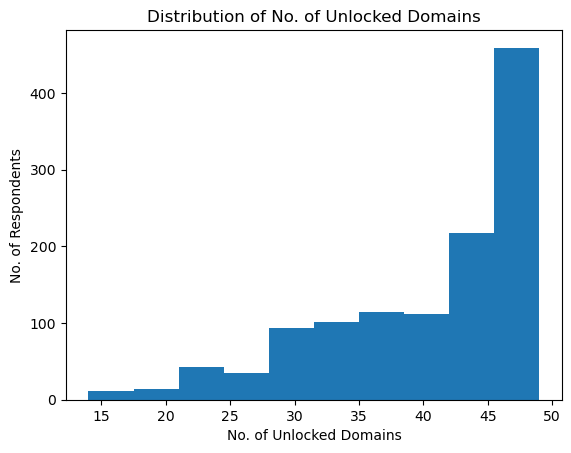

In [1355]:
plt.hist(df.unlocked_domains, bins=10)
plt.xlabel("No. of Unlocked Domains")
plt.ylabel("No. of Respondents")
plt.title("Distribution of No. of Unlocked Domains")
plt.show()

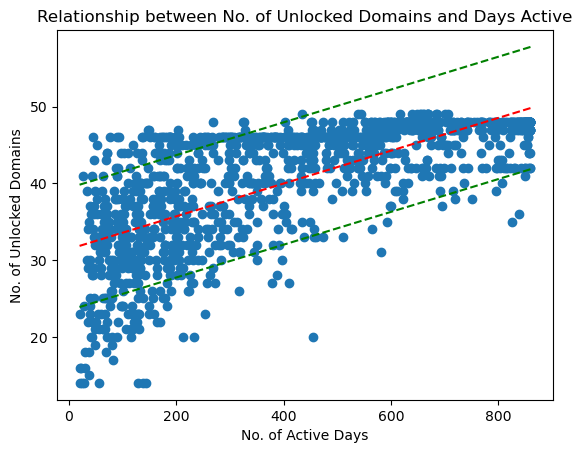

In [1356]:
x = df.days_active.tolist()
y = df.unlocked_domains.tolist()
plt.scatter(x, y)
plt.xlabel("No. of Active Days")
plt.ylabel("No. of Unlocked Domains")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.unlocked_domains.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.unlocked_domains.tolist()),"g--")
plt.title("Relationship between No. of Unlocked Domains and Days Active")
plt.xlabel("No. of Active Days")
plt.show()

                            OLS Regression Results                            
Dep. Variable:       unlocked_domains   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     357.5
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          1.43e-202
Time:                        23:01:51   Log-Likelihood:                -3731.3
No. Observations:                1203   AIC:                             7473.
Df Residuals:                    1198   BIC:                             7498.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.247e+04 

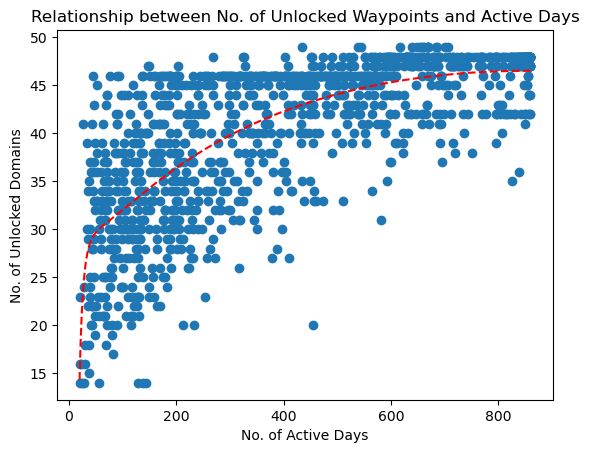

In [1357]:
# df[['days_active','days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
f = df.sort_values(by=['days_active'])
y_sm = df.unlocked_domains
x_sm = df[['days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
x_sm = sm.add_constant(x_sm)
model = sm.OLS(y_sm, x_sm)
results = model.fit()
ypred = results.predict(x_sm)
print(results.summary())

plt.scatter(df.days_active, y_sm, label='data')
plt.plot(x,ypred,"r--")
plt.title("Relationship between No. of Unlocked Waypoints and Active Days")
plt.xlabel("No. of Active Days")
plt.ylabel("No. of Unlocked Domains")
plt.show()

In [1358]:
asia_list = df[df['server'] == 'asia'].unlocked_domains.tolist()
euro_list = df[df['server'] == 'euro'].unlocked_domains.tolist()
usa_list = df[df['server'] == 'usa'].unlocked_domains.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 14 - 49 mean: 40.25720620842572
euro range: 15 - 49 mean: 40.46831955922865
usa  range: 14 - 49 mean: 39.491002570694086
0.20129896511647624 no significant difference between server


<b>Serenitea Pot</b><br>
- Teapot Level
- Teapot Visitors
- Teapot Comfort
- Teapot Items
- Floating Abode
- Emerald Peak
- Cool Isle
- Silken Courtyard
- Sublime Spicewood

In [1359]:
df.teapot_level.describe()

count    1203.000000
mean        7.501247
std         3.350162
min         1.000000
25%         4.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: teapot_level, dtype: float64

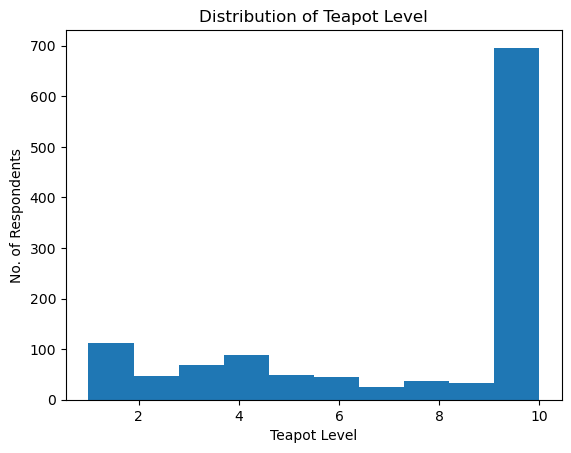

In [1360]:
plt.hist(df.teapot_level, bins=10)
plt.xlabel("Teapot Level")
plt.ylabel("No. of Respondents")
plt.title("Distribution of Teapot Level")
plt.show()

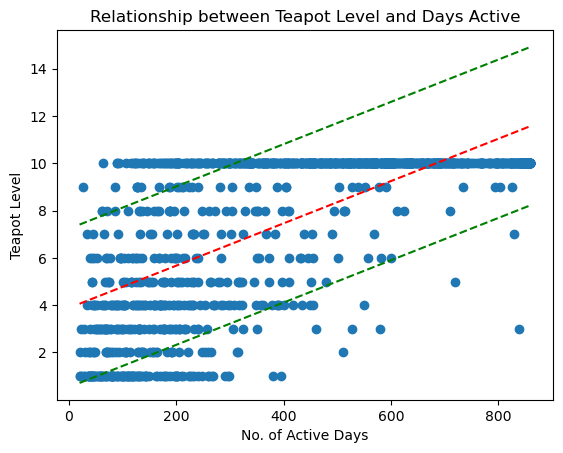

In [1361]:
x = df.days_active.tolist()
y = df.teapot_level.tolist()
plt.scatter(x, y)
plt.xlabel("No. of Active Days")
plt.ylabel("Teapot Level")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.teapot_level.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.teapot_level.tolist()),"g--")
plt.title("Relationship between Teapot Level and Days Active")
plt.show()

                            OLS Regression Results                            
Dep. Variable:           teapot_level   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     379.6
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          3.48e-211
Time:                        23:01:52   Log-Likelihood:                -2668.5
No. Observations:                1203   AIC:                             5347.
Df Residuals:                    1198   BIC:                             5372.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 5930.4832 

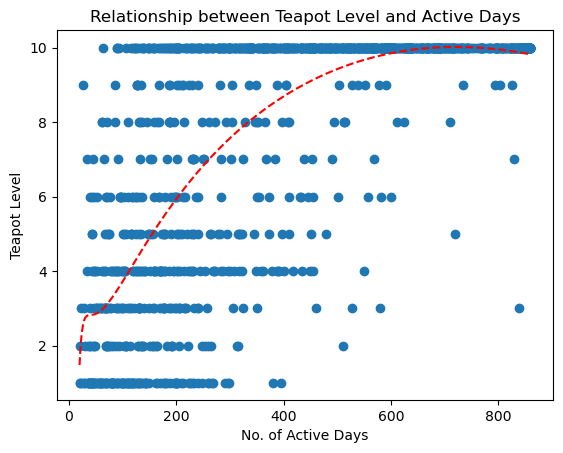

In [1362]:
# df[['days_active','days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
f = df.sort_values(by=['teapot_level'])
y_sm = df.teapot_level
x_sm = df[['days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
x_sm = sm.add_constant(x_sm)
model = sm.OLS(y_sm, x_sm)
results = model.fit()
ypred = results.predict(x_sm)
print(results.summary())

plt.scatter(df.days_active, y_sm, label='data')
plt.plot(x,ypred,"r--")
plt.title("Relationship between Teapot Level and Active Days")
plt.xlabel("No. of Active Days")
plt.ylabel("Teapot Level")
plt.show()

In [1363]:
asia_list = df[df['server'] == 'asia'].teapot_level.tolist()
euro_list = df[df['server'] == 'euro'].teapot_level.tolist()
usa_list = df[df['server'] == 'usa'].teapot_level.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 1 - 10 mean: 7.450110864745011
euro range: 1 - 10 mean: 7.760330578512397
usa  range: 1 - 10 mean: 7.318766066838046
0.1800209622893098 no significant difference between server


In [1364]:
df.teapot_visitors.describe()

count    1203.000000
mean       13.068994
std        21.193139
min         0.000000
25%         1.000000
50%         4.000000
75%        16.000000
max       188.000000
Name: teapot_visitors, dtype: float64

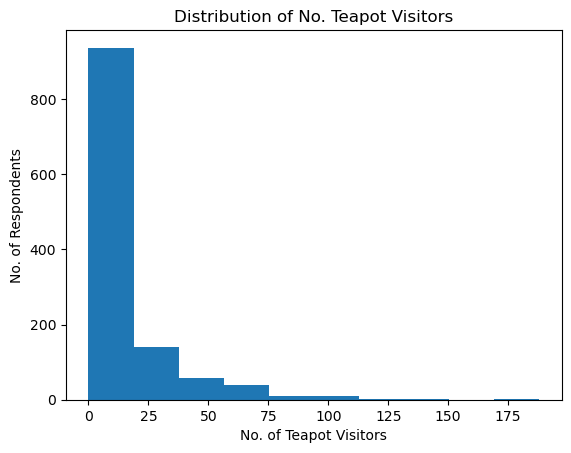

In [1365]:
plt.hist(df.teapot_visitors, bins=10)
plt.xlabel("No. of Teapot Visitors")
plt.ylabel("No. of Respondents")
plt.title("Distribution of No. Teapot Visitors")
plt.show()

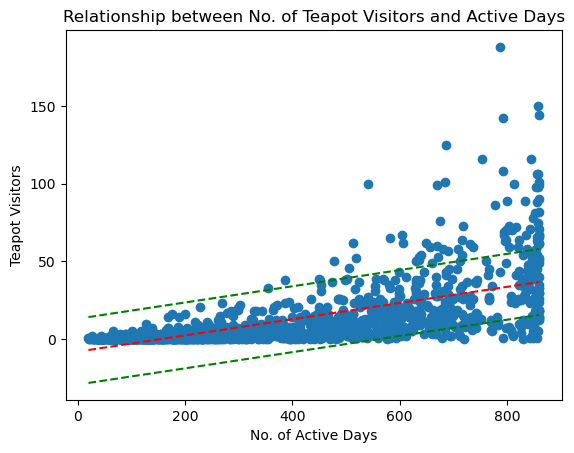

In [1366]:
x = df.days_active.tolist()
y = df.teapot_visitors.tolist()
plt.scatter(x, y)
plt.xlabel("No. of Active Days")
plt.ylabel("Teapot Visitors")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.teapot_visitors.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.teapot_visitors.tolist()),"g--")
plt.title("Relationship between No. of Teapot Visitors and Active Days")
plt.show()

                            OLS Regression Results                            
Dep. Variable:        teapot_visitors   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     234.1
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          1.46e-148
Time:                        23:01:52   Log-Likelihood:                -5032.6
No. Observations:                1203   AIC:                         1.008e+04
Df Residuals:                    1198   BIC:                         1.010e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.203e+04 

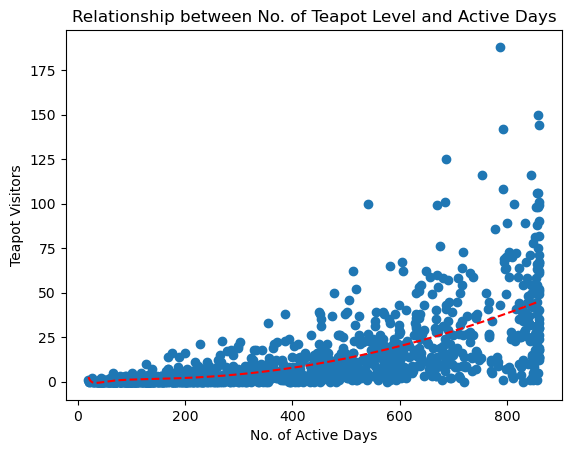

In [1367]:
# df[['days_active','days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
df = df.sort_values(by=['days_active'])
y_sm = df.teapot_visitors
x_sm = df[['days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
x_sm = sm.add_constant(x_sm)
model = sm.OLS(y_sm, x_sm)
results = model.fit()
ypred = results.predict(x_sm)
print(results.summary())

plt.scatter(df.days_active, y_sm, label='data')
plt.plot(x,ypred,"r--")
plt.title("Relationship between No. of Teapot Level and Active Days")
plt.xlabel("No. of Active Days")
plt.ylabel("Teapot Visitors")
plt.show()

In [1368]:
asia_list = df[df['server'] == 'asia'].teapot_visitors.tolist()
euro_list = df[df['server'] == 'euro'].teapot_visitors.tolist()
usa_list = df[df['server'] == 'usa'].teapot_visitors.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 0 - 188 mean: 15.361419068736142
euro range: 0 - 144 mean: 12.575757575757576
usa  range: 0 - 101 mean: 10.87146529562982
0.007911901956461687 significant difference between server


In [1369]:
df.teapot_comfort.describe()

count     1203.000000
mean     15019.600998
std      10009.880011
min       1800.000000
25%       4925.000000
50%      15610.000000
75%      22150.000000
max      68240.000000
Name: teapot_comfort, dtype: float64

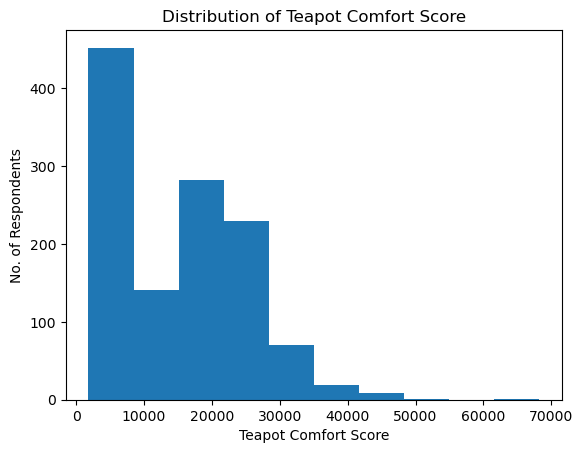

In [1370]:
plt.hist(df.teapot_comfort, bins=10)
plt.xlabel("Teapot Comfort Score")
plt.ylabel("No. of Respondents")
plt.title("Distribution of Teapot Comfort Score")
plt.show()

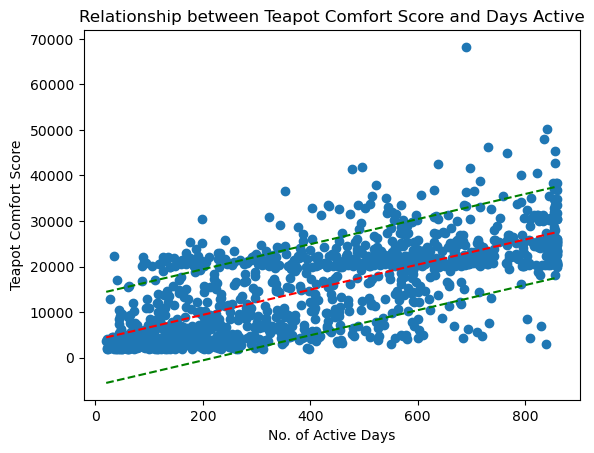

In [1371]:
x = df.days_active.tolist()
y = df.teapot_comfort.tolist()
plt.scatter(x, y)
plt.xlabel("No. of Active Days")
plt.ylabel("Teapot Comfort Score")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.teapot_comfort.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.teapot_comfort.tolist()),"g--")
plt.title("Relationship between Teapot Comfort Score and Days Active")
plt.show()

                            OLS Regression Results                            
Dep. Variable:         teapot_comfort   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     602.9
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          5.52e-182
Time:                        23:01:52   Log-Likelihood:                -12369.
No. Observations:                1203   AIC:                         2.474e+04
Df Residuals:                    1200   BIC:                         2.476e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2774.0312    598.326      4.636

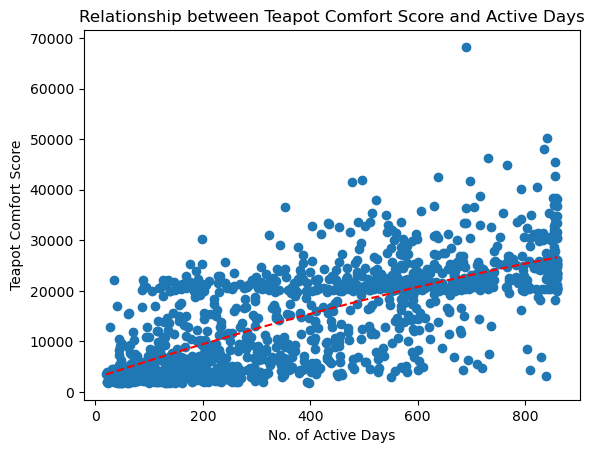

In [1372]:
# df[['days_active','days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
df = df.sort_values(by=['days_active'])
y_sm = df.teapot_comfort
x_sm = df[['days_active','days_active^2']]
x_sm = sm.add_constant(x_sm)
model = sm.OLS(y_sm, x_sm)
results = model.fit()
ypred = results.predict(x_sm)
print(results.summary())

plt.scatter(df.days_active, y_sm, label='data')
plt.plot(x,ypred,"r--")
plt.title("Relationship between Teapot Comfort Score and Active Days")
plt.xlabel("No. of Active Days")
plt.ylabel("Teapot Comfort Score")
plt.show()

In [1373]:
asia_list = df[df['server'] == 'asia'].teapot_comfort.tolist()
euro_list = df[df['server'] == 'euro'].teapot_comfort.tolist()
usa_list = df[df['server'] == 'usa'].teapot_comfort.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 1800 - 50190 mean: 15108.935698447893
euro range: 1800 - 68240 mean: 15739.69696969697
usa  range: 1800 - 48120 mean: 14244.061696658098
0.11943202570629988 no significant difference between server


In [1374]:
df.teapot_items.describe()

count    1203.000000
mean      927.616791
std       908.733378
min         3.000000
25%       239.000000
50%       659.000000
75%      1354.000000
max      7172.000000
Name: teapot_items, dtype: float64

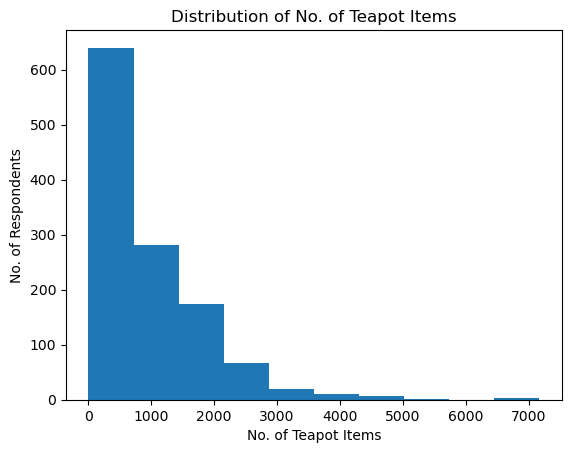

In [1375]:
plt.hist(df.teapot_items, bins=10)
plt.xlabel("No. of Teapot Items")
plt.ylabel("No. of Respondents")
plt.title("Distribution of No. of Teapot Items")
plt.show()

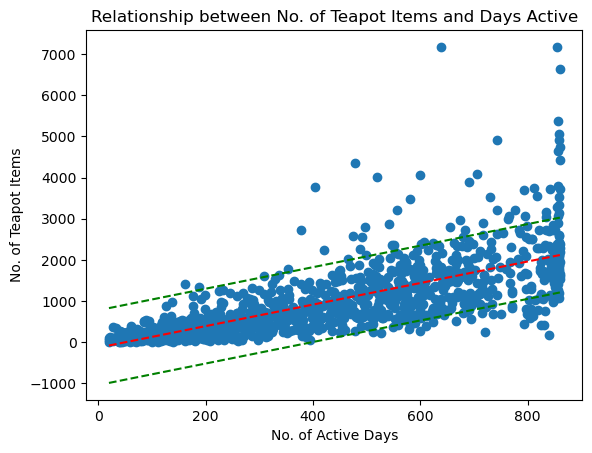

In [1376]:
x = df.days_active.tolist()
y = df.teapot_items.tolist()
plt.scatter(x, y)
plt.xlabel("No. of Active Days")
plt.ylabel("No. of Teapot Items")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.teapot_items.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.teapot_items.tolist()),"g--")
plt.title("Relationship between No. of Teapot Items and Days Active")
plt.xlabel("No. of Active Days")
plt.show()

                            OLS Regression Results                            
Dep. Variable:           teapot_items   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     733.1
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          9.59e-209
Time:                        23:01:53   Log-Likelihood:                -9421.2
No. Observations:                1203   AIC:                         1.885e+04
Df Residuals:                    1200   BIC:                         1.886e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -662.9365    187.643  

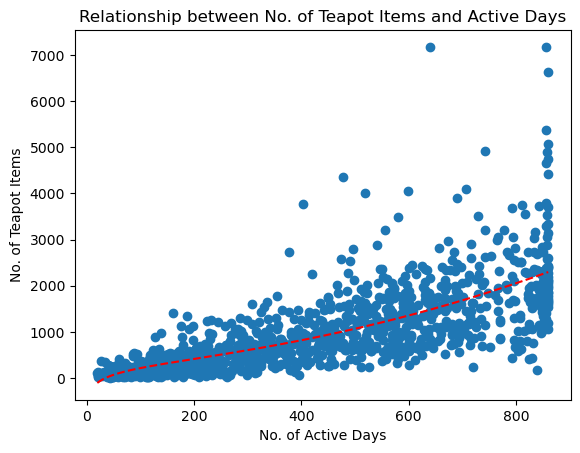

In [1377]:
# df[['days_active','days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
df = df.sort_values(by=['days_active'])
y_sm = df.teapot_items
x_sm = df[['days_active^2','log(days_active)']]
x_sm = sm.add_constant(x_sm)
model = sm.OLS(y_sm, x_sm)
results = model.fit()
ypred = results.predict(x_sm)
print(results.summary())

plt.scatter(df.days_active, y_sm, label='data')
plt.plot(x,ypred,"r--")
plt.title("Relationship between No. of Teapot Items and Active Days")
plt.xlabel("No. of Active Days")
plt.ylabel("No. of Teapot Items")
plt.show()

In [1378]:
asia_list = df[df['server'] == 'asia'].teapot_items.tolist()
euro_list = df[df['server'] == 'euro'].teapot_items.tolist()
usa_list = df[df['server'] == 'usa'].teapot_items.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 15 - 4906 mean: 924.019955654102
euro range: 3 - 5063 mean: 979.5454545454545
usa  range: 14 - 7172 mean: 883.3290488431877
0.3473751463155243 no significant difference between server


In [1379]:
df.teapot_realm.value_counts()

1    404
5    292
4    241
3    149
2    117
Name: teapot_realm, dtype: int64

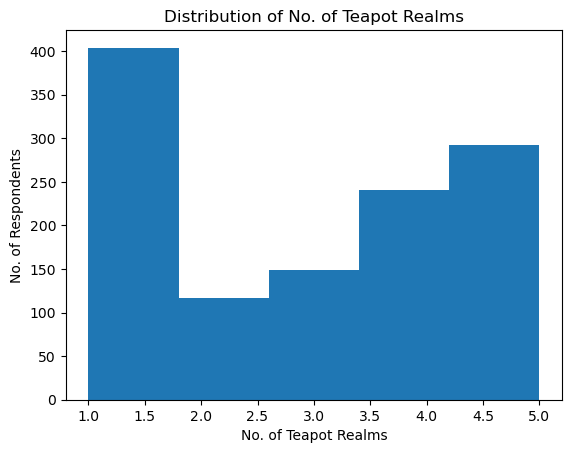

In [1380]:
plt.hist(df.teapot_realm, bins=5)
plt.xlabel("No. of Teapot Realms")
plt.ylabel("No. of Respondents")
plt.title("Distribution of No. of Teapot Realms")
plt.show()

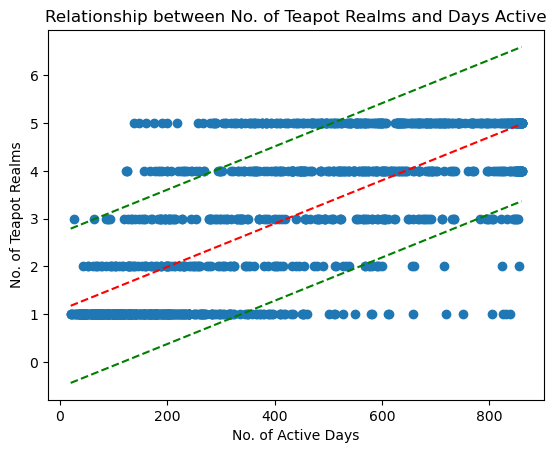

In [1381]:
x = df.days_active.tolist()
y = df.teapot_realm.tolist()
plt.scatter(x, y)
plt.xlabel("No. of Active Days")
plt.ylabel("No. of Teapot Realms")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.teapot_realm.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.teapot_realm.tolist()),"g--")
plt.title("Relationship between No. of Teapot Realms and Days Active")
plt.xlabel("No. of Active Days")
plt.show()

                            OLS Regression Results                            
Dep. Variable:           teapot_realm   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     500.4
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          8.91e-211
Time:                        23:01:53   Log-Likelihood:                -1794.5
No. Observations:                1203   AIC:                             3597.
Df Residuals:                    1199   BIC:                             3617.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   31.8874 

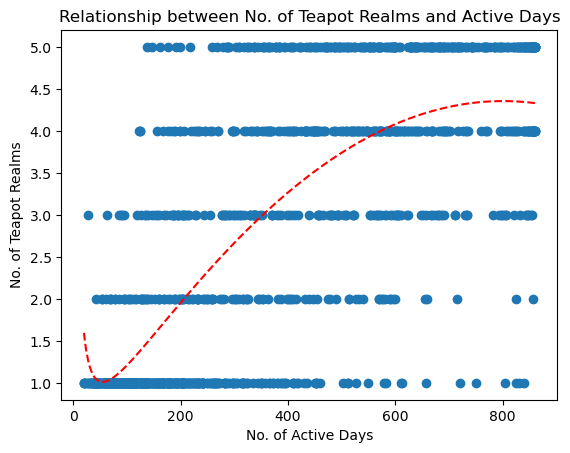

In [1382]:
# df[['days_active','days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
df = df.sort_values(by=['days_active'])
y_sm = df.teapot_realm
x_sm = df[['days_active','days_active^2','sigmoid(days_active)']]
x_sm = sm.add_constant(x_sm)
model = sm.OLS(y_sm, x_sm)
results = model.fit()
ypred = results.predict(x_sm)
print(results.summary())

plt.scatter(df.days_active, y_sm, label='data')
plt.plot(x,ypred,"r--")
plt.title("Relationship between No. of Teapot Realms and Active Days")
plt.xlabel("No. of Active Days")
plt.ylabel("No. of Teapot Realms")
plt.show()

In [1383]:
asia_list = df[df['server'] == 'asia'].teapot_realm.tolist()
euro_list = df[df['server'] == 'euro'].teapot_realm.tolist()
usa_list = df[df['server'] == 'usa'].teapot_realm.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 1 - 5 mean: 2.8736141906873613
euro range: 1 - 5 mean: 3.0964187327823693
usa  range: 1 - 5 mean: 2.7994858611825193
0.03211951015052067 significant difference between server


<b>Spiral Abyss</b><br>

In [1384]:
df.abyss_score1.describe()

count    1203.000000
mean       20.822111
std        13.899507
min         0.000000
25%         5.500000
50%        24.000000
75%        34.000000
max        36.000000
Name: abyss_score1, dtype: float64

In [1385]:
df.abyss_score2.describe()

count    1203.000000
mean        4.182876
std         5.263582
min        -2.000000
25%         0.000000
50%         0.000000
75%        10.000000
max        12.000000
Name: abyss_score2, dtype: float64

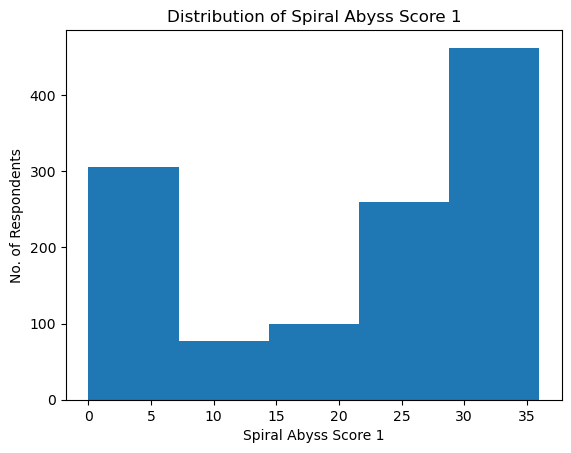

In [1386]:
plt.hist(df.abyss_score1, bins=5)
plt.xlabel("Spiral Abyss Score 1")
plt.ylabel("No. of Respondents")
plt.title("Distribution of Spiral Abyss Score 1")
plt.show()

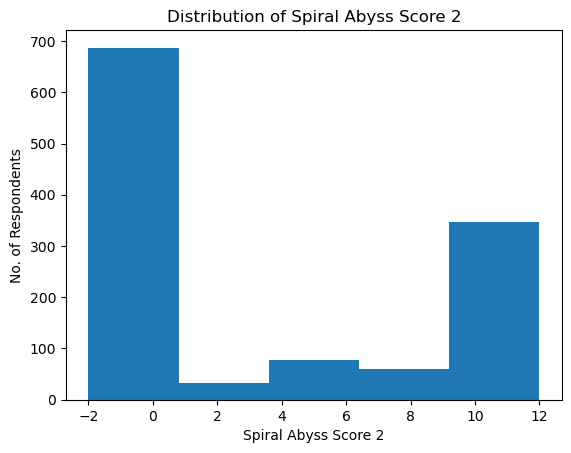

In [1387]:
plt.hist(df.abyss_score2, bins=5)
plt.xlabel("Spiral Abyss Score 2")
plt.ylabel("No. of Respondents")
plt.title("Distribution of Spiral Abyss Score 2")
plt.show()

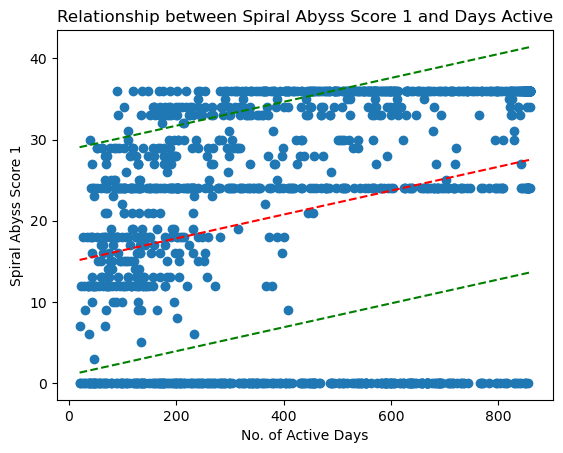

In [1388]:
x = df.days_active.tolist()
y = df.abyss_score1.tolist()
plt.scatter(x, y)
plt.xlabel("No. of Active Days")
plt.ylabel("Spiral Abyss Score 1")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.abyss_score1.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.abyss_score1.tolist()),"g--")
plt.title("Relationship between Spiral Abyss Score 1 and Days Active")
plt.xlabel("No. of Active Days")
plt.show()

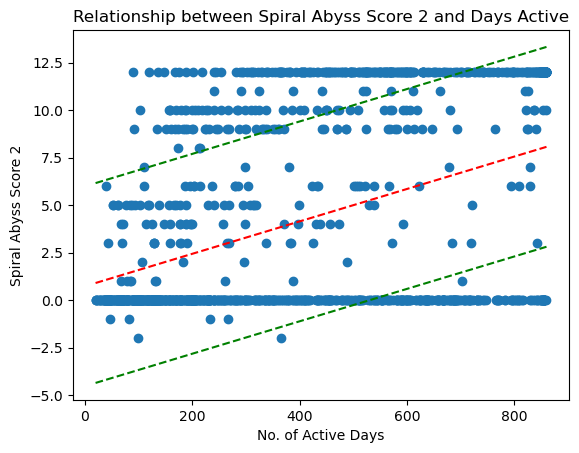

In [1389]:
x = df.days_active.tolist()
y = df.abyss_score2.tolist()
plt.scatter(x, y)
plt.xlabel("No. of Active Days")
plt.ylabel("Spiral Abyss Score 2")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.abyss_score2.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.abyss_score2.tolist()),"g--")
plt.title("Relationship between Spiral Abyss Score 2 and Days Active")
plt.xlabel("No. of Active Days")
plt.show()

                            OLS Regression Results                            
Dep. Variable:           abyss_score1   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     38.98
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           4.92e-24
Time:                        23:01:53   Log-Likelihood:                -4816.6
No. Observations:                1203   AIC:                             9641.
Df Residuals:                    1199   BIC:                             9662.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -27.3350      9.622  

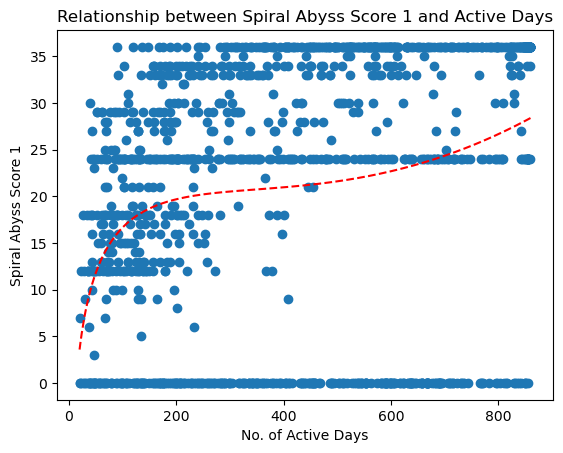

In [1390]:
# df[['days_active','days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
df = df.sort_values(by=['days_active'])
y_sm = df.abyss_score1
x_sm = df[['days_active','days_active^2','log(days_active)']]
x_sm = sm.add_constant(x_sm)
model = sm.OLS(y_sm, x_sm)
results = model.fit()
ypred = results.predict(x_sm)
print(results.summary())

plt.scatter(df.days_active, y_sm, label='data')
plt.plot(x,ypred,"r--")
plt.title("Relationship between Spiral Abyss Score 1 and Active Days")
plt.xlabel("No. of Active Days")
plt.ylabel("Spiral Abyss Score 1")
plt.show()

                            OLS Regression Results                            
Dep. Variable:           abyss_score2   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     55.83
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           3.02e-52
Time:                        23:01:53   Log-Likelihood:                -3578.4
No. Observations:                1203   AIC:                             7169.
Df Residuals:                    1197   BIC:                             7199.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.107e+04 

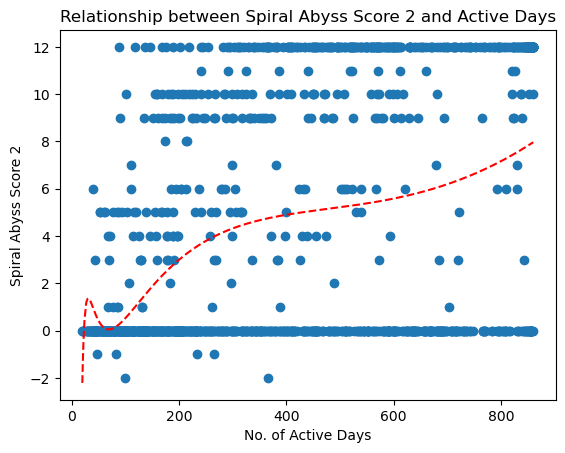

In [1391]:
# df[['days_active','days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
df = df.sort_values(by=['days_active'])
y_sm = df.abyss_score2
x_sm = df[['days_active','days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
x_sm = sm.add_constant(x_sm)
model = sm.OLS(y_sm, x_sm)
results = model.fit()
ypred = results.predict(x_sm)
print(results.summary())

plt.scatter(df.days_active, y_sm, label='data')
plt.plot(x,ypred,"r--")
plt.title("Relationship between Spiral Abyss Score 2 and Active Days")
plt.xlabel("No. of Active Days")
plt.ylabel("Spiral Abyss Score 2")
plt.show()

In [1392]:
asia_list = df[df['server'] == 'asia'].abyss_score1.tolist()
euro_list = df[df['server'] == 'euro'].abyss_score1.tolist()
usa_list = df[df['server'] == 'usa'].abyss_score1.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 0 - 36 mean: 22.303769401330378
euro range: 0 - 36 mean: 19.52892561983471
usa  range: 0 - 36 mean: 20.311053984575835
0.012213353799909588 significant difference between server


In [1393]:
asia_list = df[df['server'] == 'asia'].abyss_score2.tolist()
euro_list = df[df['server'] == 'euro'].abyss_score2.tolist()
usa_list = df[df['server'] == 'usa'].abyss_score2.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: -2 - 12 mean: 4.6252771618625275
euro range: -2 - 12 mean: 3.961432506887052
usa  range: -1 - 12 mean: 3.8766066838046274
0.07623048706046072 no significant difference between server


In [1394]:
df_cluster = df[['level','achievements','days_active','characters','culi',
                 'common_chests','exquisite_chests','precious_chests','luxurious_chests',
                 'remarkable_chests','unlocked_waypoints','unlocked_domains','teapot_realm',
                 'teapot_visitors','teapot_comfort','teapot_items',
                 'total_explored','abyss_score1','total_5_characters','total_5_constellation',
                 'total_5_weapon','total_5_refinement']]

<b>Modelling using Hierarchical Method</b><br>

In [1395]:
Z = linkage(df_cluster, 'single')
c, coph_dists = cophenet(Z, pdist(df_cluster))
c

0.4376170212880058

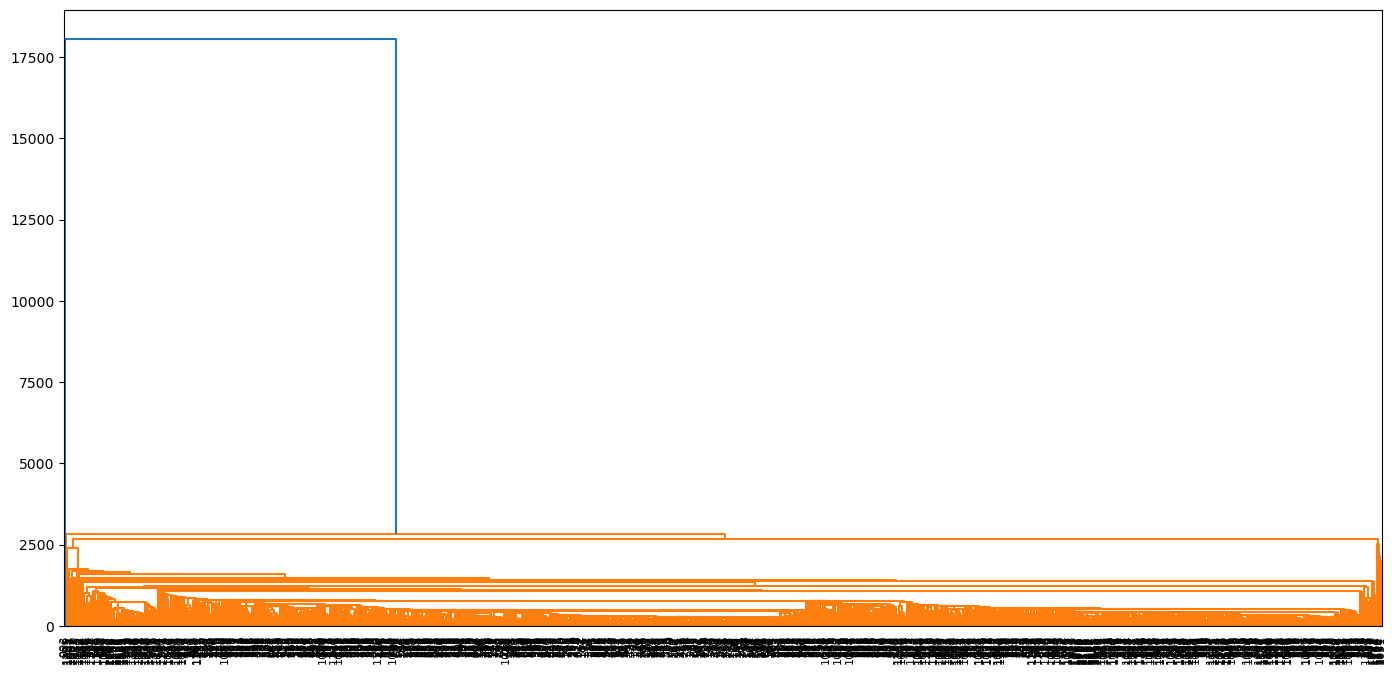

In [1396]:
plt.figure(figsize=(17,8))
_ = dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)

<b>Modelling using KMeans Method</b><br>

<b>KMeans Method</b>

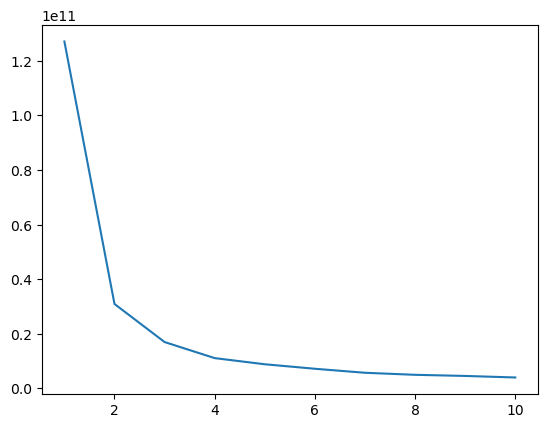

In [1397]:
temp_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=4, random_state=0)
    kmeans.fit(df_cluster)
    temp_list.append(kmeans.inertia_)
plt.plot(range(1, 11), temp_list)
plt.show()

In [1398]:
kmeans = KMeans(n_clusters=4, n_init=4, random_state=0)
kmeans.fit(df_cluster)
df_cluster['kmeans'] = kmeans.labels_
df_cluster.kmeans.value_counts()

1    462
3    448
0    192
2    101
Name: kmeans, dtype: int64

In [1399]:
df_cluster.kmeans = df_cluster.kmeans.replace({0: 'Sophomore', 1: 'Junior', 2: 'Senior', 3: 'Freshman'})

<b>Distribution by Archetypes</b>

F-stats: 379.74 p-value: 0.0 significant difference between clusters


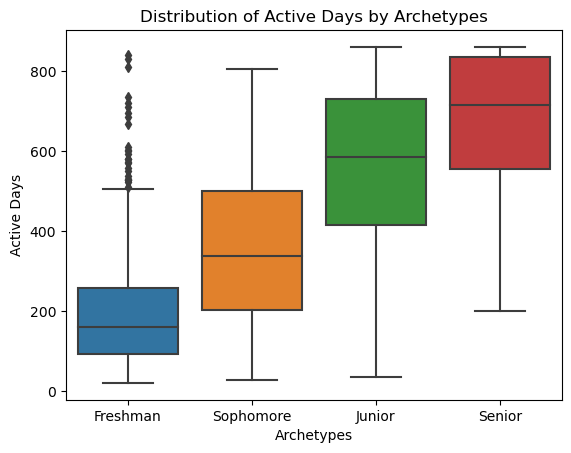

In [1400]:
boxplot = sns.boxplot(x = df_cluster.kmeans, y = df_cluster.days_active)
boxplot.axes.set_title("Distribution of Active Days by Archetypes")
boxplot.set_xlabel("Archetypes")
boxplot.set_ylabel("Active Days")

d_data = {grp:df_cluster['days_active'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

In [1401]:
df_cluster.groupby(['kmeans'])['days_active'].describe()

count        mean         std    min     25%    50%     75%    max
kmeans                                                                       
Freshman   448.0  200.830357  151.866752   20.0   91.75  159.5  258.25  839.0
Junior     462.0  562.688312  213.747074   34.0  414.00  586.0  729.00  860.0
Senior     101.0  684.613861  162.162941  199.0  556.00  716.0  835.00  860.0
Sophomore  192.0  352.156250  186.158286   27.0  203.00  338.0  499.00  804.0

F-stats: 187.59 p-value: 0.0 significant difference between clusters


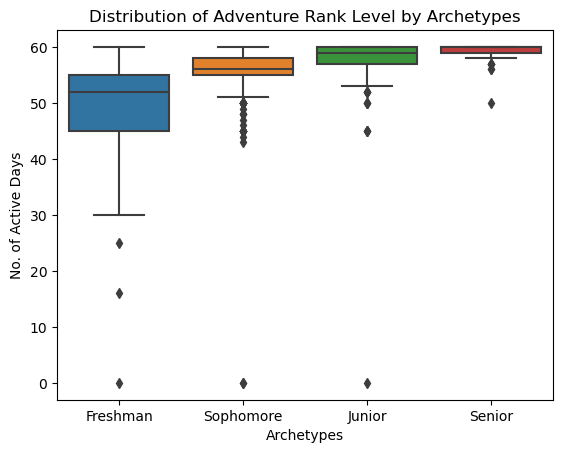

In [1402]:
boxplot = sns.boxplot(x = df_cluster.kmeans, y = df_cluster.level)
boxplot.axes.set_title("Distribution of Adventure Rank Level by Archetypes")
boxplot.set_xlabel("Archetypes")
boxplot.set_ylabel("No. of Active Days")

grps = pd.unique(df_cluster.kmeans.values)
d_data = {grp:df_cluster['level'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

In [1403]:
df_cluster.groupby(['kmeans'])['level'].describe()

count       mean       std   min   25%   50%   75%   max
kmeans                                                             
Freshman   448.0  50.113839  7.080741   0.0  45.0  52.0  55.0  60.0
Junior     462.0  58.222944  3.440236   0.0  57.0  59.0  60.0  60.0
Senior     101.0  59.316832  1.341124  50.0  59.0  60.0  60.0  60.0
Sophomore  192.0  54.713542  6.799001   0.0  55.0  56.0  58.0  60.0

F-stats: 735.88 p-value: 0.0 significant difference between clusters


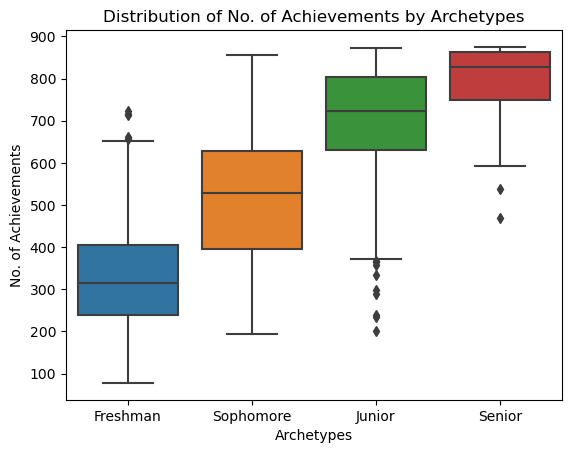

In [1404]:
boxplot = sns.boxplot(x = df_cluster.kmeans, y = df_cluster.achievements)
boxplot.axes.set_title("Distribution of No. of Achievements by Archetypes")
boxplot.set_xlabel("Archetypes")
boxplot.set_ylabel("No. of Achievements")

d_data = {grp:df_cluster['achievements'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

In [1405]:
df_cluster.groupby(['kmeans'])['achievements'].describe()

count        mean         std    min    25%    50%     75%    max
kmeans                                                                      
Freshman   448.0  337.267857  125.427233   78.0  240.0  316.0  406.00  723.0
Junior     462.0  700.324675  132.311564  200.0  629.5  724.0  803.75  872.0
Senior     101.0  791.693069   88.271257  470.0  748.0  827.0  862.00  875.0
Sophomore  192.0  512.375000  146.827872  194.0  395.0  527.5  628.00  857.0

F-stats: 330.72 p-value: 0.0 significant difference between clusters


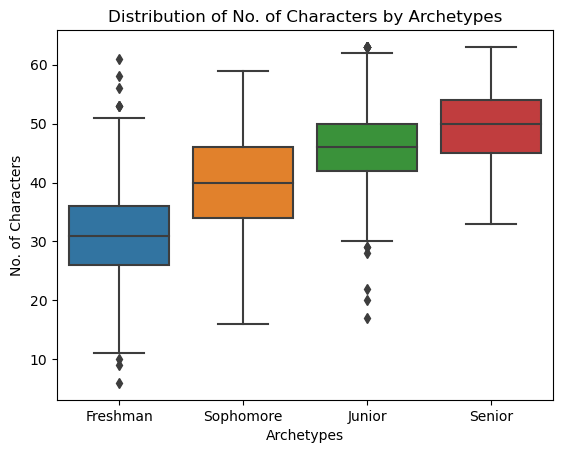

In [1406]:
boxplot = sns.boxplot(x = df_cluster.kmeans, y = df_cluster.characters)
boxplot.axes.set_title("Distribution of No. of Characters by Archetypes")
boxplot.set_xlabel("Archetypes")
boxplot.set_ylabel("No. of Characters")

d_data = {grp:df_cluster['characters'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

In [1407]:
df_cluster.groupby(['kmeans'])['characters'].describe()

count       mean       std   min   25%   50%   75%   max
kmeans                                                             
Freshman   448.0  31.200893  8.224468   6.0  26.0  31.0  36.0  61.0
Junior     462.0  46.196970  7.287864  17.0  42.0  46.0  50.0  63.0
Senior     101.0  49.435644  6.487551  33.0  45.0  50.0  54.0  63.0
Sophomore  192.0  39.208333  8.968726  16.0  34.0  40.0  46.0  59.0

F-stats: 255.49 p-value: 0.0 significant difference between clusters


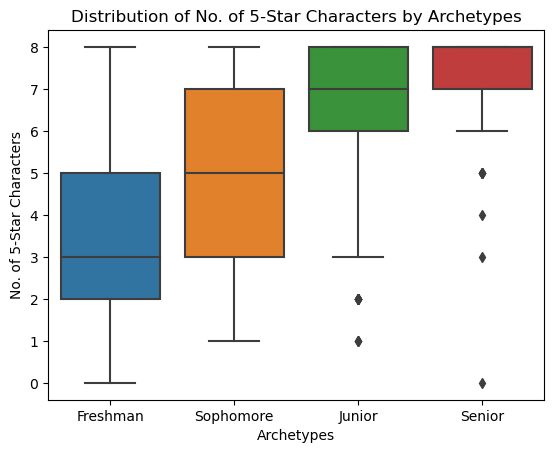

In [1436]:
boxplot = sns.boxplot(x = df_cluster.kmeans, y = df_cluster.total_5_characters)
boxplot.axes.set_title("Distribution of No. of 5-Star Characters by Archetypes")
boxplot.set_xlabel("Archetypes")
boxplot.set_ylabel("No. of 5-Star Characters")

d_data = {grp:df_cluster['total_5_characters'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

In [1437]:
df_cluster.groupby(['kmeans'])['total_5_characters'].describe()

count      mean       std  min  25%  50%  75%  max
kmeans                                                       
Freshman   448.0  3.598214  1.909401  0.0  2.0  3.0  5.0  8.0
Junior     462.0  6.692641  1.640297  1.0  6.0  7.0  8.0  8.0
Senior     101.0  7.168317  1.265459  0.0  7.0  8.0  8.0  8.0
Sophomore  192.0  5.161458  2.237232  1.0  3.0  5.0  7.0  8.0

F-stats: 57.75 p-value: 0.0 significant difference between clusters


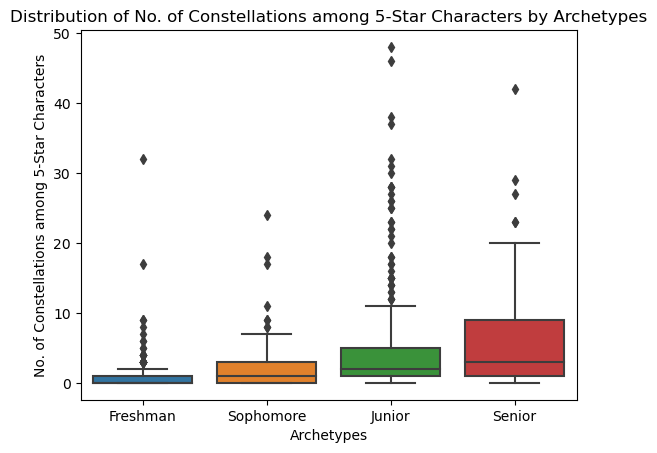

In [1438]:
boxplot = sns.boxplot(x = df_cluster.kmeans, y = df_cluster.total_5_constellation)
boxplot.axes.set_title("Distribution of No. of Constellations among 5-Star Characters by Archetypes")
boxplot.set_xlabel("Archetypes")
boxplot.set_ylabel("No. of Constellations among 5-Star Characters")

d_data = {grp:df_cluster['total_5_constellation'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

In [1439]:
df_cluster.groupby(['kmeans'])['total_5_constellation'].describe()

count      mean       std  min  25%  50%  75%   max
kmeans                                                        
Freshman   448.0  0.765625  2.074879  0.0  0.0  0.0  1.0  32.0
Junior     462.0  4.367965  6.558174  0.0  1.0  2.0  5.0  48.0
Senior     101.0  5.970297  7.305416  0.0  1.0  3.0  9.0  42.0
Sophomore  192.0  1.869792  3.040516  0.0  0.0  1.0  3.0  24.0

F-stats: 145.2 p-value: 0.0 significant difference between clusters


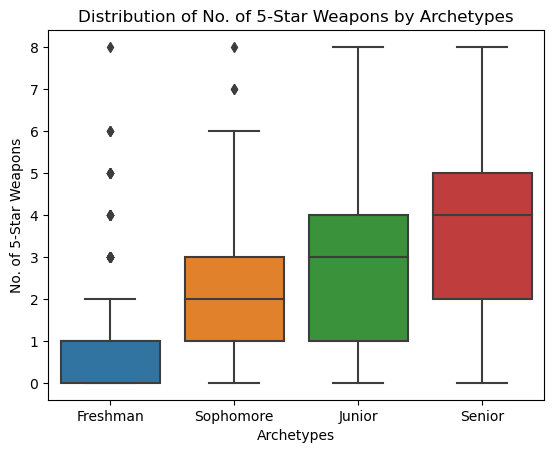

In [1440]:
boxplot = sns.boxplot(x = df_cluster.kmeans, y = df_cluster.total_5_weapon)
boxplot.axes.set_title("Distribution of No. of 5-Star Weapons by Archetypes")
boxplot.set_xlabel("Archetypes")
boxplot.set_ylabel("No. of 5-Star Weapons")

d_data = {grp:df_cluster['total_5_weapon'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

In [1441]:
df_cluster.groupby(['kmeans'])['total_5_weapon'].describe()

count      mean       std  min  25%  50%  75%  max
kmeans                                                       
Freshman   448.0  0.950893  1.188046  0.0  0.0  1.0  1.0  8.0
Junior     462.0  2.896104  1.958913  0.0  1.0  3.0  4.0  8.0
Senior     101.0  3.871287  1.869028  0.0  2.0  4.0  5.0  8.0
Sophomore  192.0  2.020833  1.712163  0.0  1.0  2.0  3.0  8.0

F-stats: 85.81 p-value: 0.0 significant difference between clusters


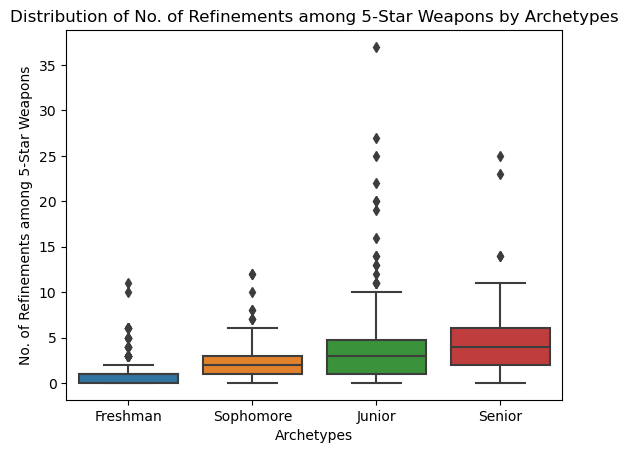

In [1442]:
boxplot = sns.boxplot(x = df_cluster.kmeans, y = df_cluster.total_5_refinement)
boxplot.axes.set_title("Distribution of No. of Refinements among 5-Star Weapons by Archetypes")
boxplot.set_xlabel("Archetypes")
boxplot.set_ylabel("No. of Refinements among 5-Star Weapons")


d_data = {grp:df_cluster['total_5_refinement'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

In [1443]:
df_cluster.groupby(['kmeans'])['total_5_refinement'].describe()

count      mean       std  min  25%  50%   75%   max
kmeans                                                         
Freshman   448.0  1.000000  1.361010  0.0  0.0  1.0  1.00  11.0
Junior     462.0  3.549784  3.720832  0.0  1.0  3.0  4.75  37.0
Senior     101.0  4.752475  3.829898  0.0  2.0  4.0  6.00  25.0
Sophomore  192.0  2.203125  2.113381  0.0  1.0  2.0  3.00  12.0

F-stats: 594.43 p-value: 0.0 significant difference between clusters


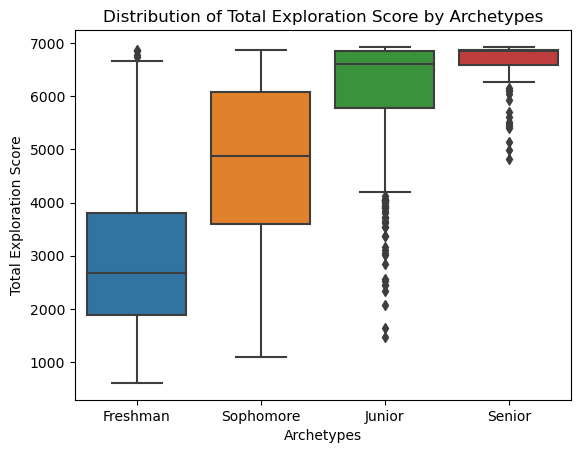

In [1447]:
boxplot = sns.boxplot(x = df_cluster.kmeans, y = df_cluster.total_explored)
boxplot.axes.set_title("Distribution of Total Exploration Score by Archetypes")
boxplot.set_xlabel("Archetypes")
boxplot.set_ylabel("Total Exploration Score")

d_data = {grp:df_cluster['total_explored'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

In [1433]:
df_cluster.groupby(['kmeans'])['total_explored'].describe()

count         mean          std     min      25%     50%      75%  \
kmeans                                                                         
Freshman   448.0  2941.073661  1353.027047   607.0  1890.00  2677.5  3812.00   
Junior     462.0  6115.235931  1058.080964  1476.0  5789.25  6610.0  6850.00   
Senior     101.0  6633.237624   463.137672  4819.0  6598.00  6850.0  6880.00   
Sophomore  192.0  4709.447917  1534.547524  1099.0  3604.75  4876.5  6078.25   

              max  
kmeans             
Freshman   6870.0  
Junior     6930.0  
Senior     6930.0  
Sophomore  6870.0

F-stats: 460.17 p-value: 0.0 significant difference between clusters


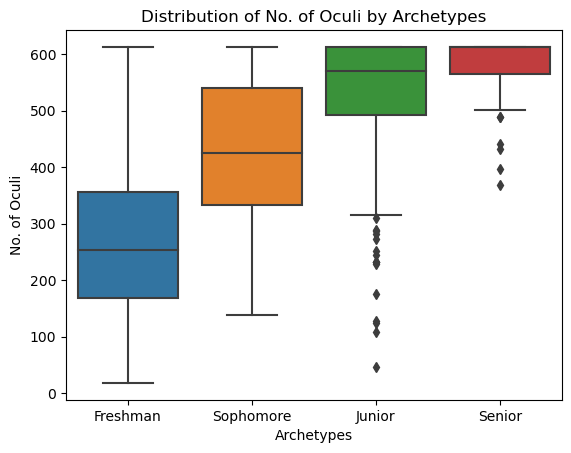

In [1408]:
boxplot = sns.boxplot(x = df_cluster.kmeans, y = df_cluster.culi)
boxplot.axes.set_title("Distribution of No. of Oculi by Archetypes")
boxplot.set_xlabel("Archetypes")
boxplot.set_ylabel("No. of Oculi")

d_data = {grp:df_cluster['culi'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

In [1409]:
df_cluster.groupby(['kmeans'])['culi'].describe()

count        mean         std    min     25%    50%     75%    max
kmeans                                                                       
Freshman   448.0  270.997768  135.286828   18.0  167.75  253.0  355.25  612.0
Junior     462.0  534.943723  100.265986   46.0  493.00  571.0  613.00  613.0
Senior     101.0  583.277228   49.237408  369.0  565.00  613.0  613.00  613.0
Sophomore  192.0  424.223958  129.713808  138.0  333.00  424.5  540.75  613.0

F-stats: 667.59 p-value: 0.0 significant difference between clusters


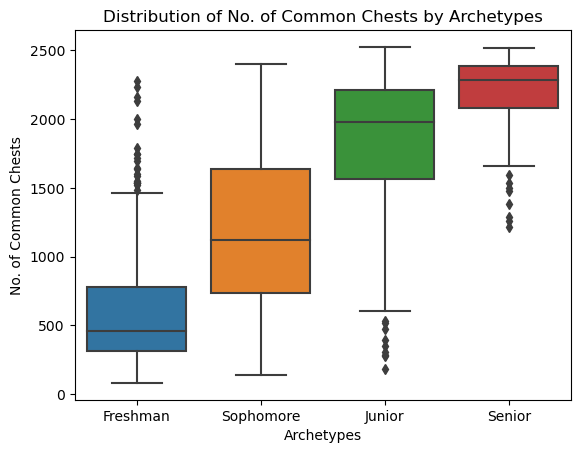

In [1410]:
boxplot = sns.boxplot(x = df_cluster.kmeans, y = df_cluster.common_chests)
boxplot.axes.set_title("Distribution of No. of Common Chests by Archetypes")
boxplot.set_xlabel("Archetypes")
boxplot.set_ylabel("No. of Common Chests")

d_data = {grp:df_cluster['common_chests'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

In [1411]:
df_cluster.groupby(['kmeans'])['common_chests'].describe()

count         mean         std     min      25%     50%      75%  \
kmeans                                                                        
Freshman   448.0   597.310268  405.924751    81.0   313.00   455.5   776.00   
Junior     462.0  1832.257576  505.546517   183.0  1561.75  1979.0  2212.75   
Senior     101.0  2177.326733  298.927620  1219.0  2078.00  2283.0  2385.00   
Sophomore  192.0  1173.203125  554.624655   141.0   731.75  1119.0  1637.25   

              max  
kmeans             
Freshman   2278.0  
Junior     2526.0  
Senior     2521.0  
Sophomore  2404.0

F-stats: 673.56 p-value: 0.0 significant difference between clusters


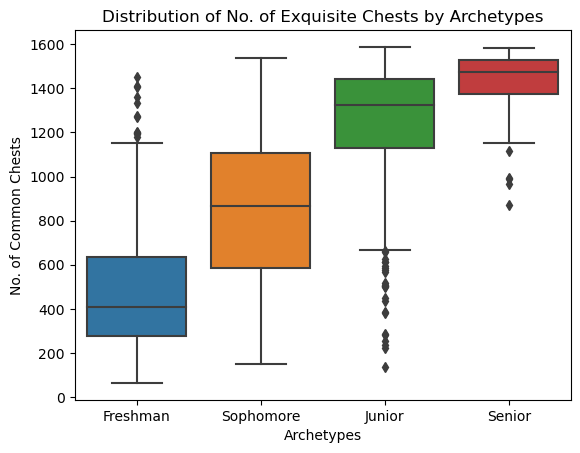

In [1412]:
boxplot = sns.boxplot(x = df_cluster.kmeans, y = df_cluster.exquisite_chests)
boxplot.axes.set_title("Distribution of No. of Exquisite Chests by Archetypes")
boxplot.set_xlabel("Archetypes")
boxplot.set_ylabel("No. of Common Chests")

d_data = {grp:df_cluster['exquisite_chests'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

In [1413]:
df_cluster.groupby(['kmeans'])['exquisite_chests'].describe()

count         mean         std    min      25%     50%      75%  \
kmeans                                                                       
Freshman   448.0   486.098214  276.901495   64.0   279.00   408.5   636.50   
Junior     462.0  1243.932900  280.586282  137.0  1131.25  1324.5  1441.00   
Senior     101.0  1424.445545  147.121955  873.0  1375.00  1472.0  1527.00   
Sophomore  192.0   851.177083  338.197485  151.0   583.25   866.5  1106.25   

              max  
kmeans             
Freshman   1452.0  
Junior     1588.0  
Senior     1583.0  
Sophomore  1539.0

F-stats: 656.51 p-value: 0.0 significant difference between clusters


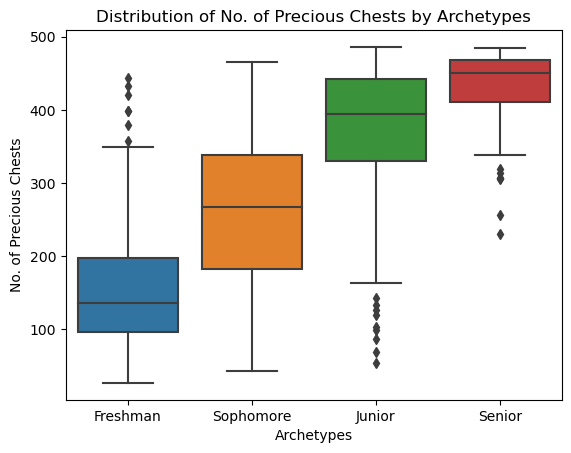

In [1414]:
boxplot = sns.boxplot(x = df_cluster.kmeans, y = df_cluster.precious_chests)
boxplot.axes.set_title("Distribution of No. of Precious Chests by Archetypes")
boxplot.set_xlabel("Archetypes")
boxplot.set_ylabel("No. of Precious Chests")

d_data = {grp:df_cluster['precious_chests'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

In [1415]:
df_cluster.groupby(['kmeans'])['precious_chests'].describe()

count        mean        std    min     25%    50%     75%    max
kmeans                                                                      
Freshman   448.0  153.584821  78.311470   27.0   97.00  135.5  198.25  443.0
Junior     462.0  374.614719  85.779739   54.0  330.25  394.0  442.00  486.0
Senior     101.0  429.722772  53.538793  231.0  411.00  450.0  468.00  484.0
Sophomore  192.0  257.473958  99.513841   43.0  183.25  268.0  338.25  465.0

F-stats: 631.07 p-value: 0.0 significant difference between clusters


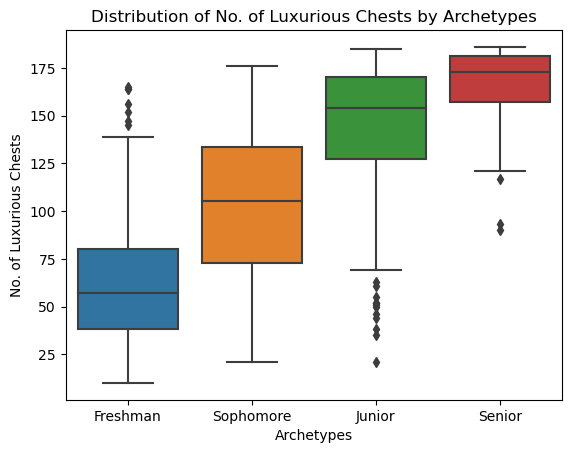

In [1416]:
boxplot = sns.boxplot(x = df_cluster.kmeans, y = df_cluster.luxurious_chests)
boxplot.axes.set_title("Distribution of No. of Luxurious Chests by Archetypes")
boxplot.set_xlabel("Archetypes")
boxplot.set_ylabel("No. of Luxurious Chests")

d_data = {grp:df_cluster['luxurious_chests'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

In [1417]:
df_cluster.groupby(['kmeans'])['luxurious_chests'].describe()

count        mean        std   min    25%    50%    75%    max
kmeans                                                                   
Freshman   448.0   62.729911  31.112710  10.0   38.0   57.0   80.0  165.0
Junior     462.0  145.491342  31.528229  21.0  127.5  154.0  170.0  185.0
Senior     101.0  165.257426  20.238900  90.0  157.0  173.0  181.0  186.0
Sophomore  192.0  103.088542  37.709658  21.0   73.0  105.5  133.5  176.0

F-stats: 538.11 p-value: 0.0 significant difference between clusters


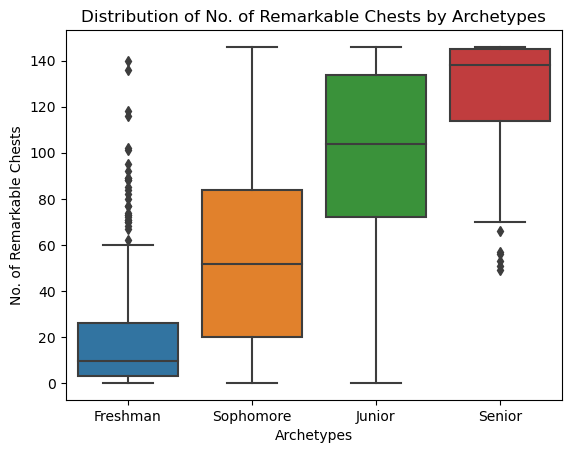

In [1418]:
boxplot = sns.boxplot(x = df_cluster.kmeans, y = df_cluster.remarkable_chests)
boxplot.axes.set_title("Distribution of No. of Remarkable Chests by Archetypes")
boxplot.set_xlabel("Archetypes")
boxplot.set_ylabel("No. of Remarkable Chests")

d_data = {grp:df_cluster['remarkable_chests'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

In [1419]:
df_cluster.groupby(['kmeans'])['remarkable_chests'].describe()

count        mean        std   min    25%    50%     75%    max
kmeans                                                                    
Freshman   448.0   18.462054  23.425037   0.0    3.0    9.5   26.25  140.0
Junior     462.0   98.324675  40.250875   0.0   72.0  104.0  134.00  146.0
Senior     101.0  124.722772  26.447729  49.0  114.0  138.0  145.00  146.0
Sophomore  192.0   55.244792  40.911442   0.0   20.0   51.5   84.00  146.0

F-stats: 229.24 p-value: 0.0 significant difference between clusters


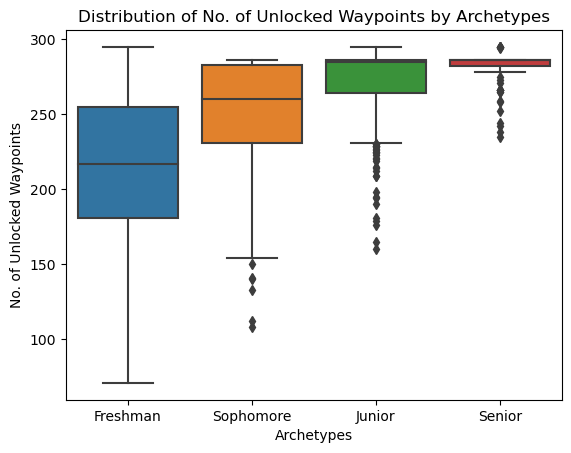

In [1420]:
boxplot = sns.boxplot(x = df_cluster.kmeans, y = df_cluster.unlocked_waypoints)
boxplot.axes.set_title("Distribution of No. of Unlocked Waypoints by Archetypes")
boxplot.set_xlabel("Archetypes")
boxplot.set_ylabel("No. of Unlocked Waypoints")

d_data = {grp:df_cluster['unlocked_waypoints'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

In [1421]:
df_cluster.groupby(['kmeans'])['unlocked_waypoints'].describe()

count        mean        std    min     25%    50%    75%    max
kmeans                                                                     
Freshman   448.0  212.207589  50.050259   71.0  180.75  217.0  255.0  295.0
Junior     462.0  271.898268  22.158188  160.0  264.00  285.0  286.0  295.0
Senior     101.0  281.188119  11.467095  235.0  282.00  286.0  286.0  295.0
Sophomore  192.0  249.505208  39.197847  108.0  230.75  260.0  283.0  286.0

F-stats: 331.77 p-value: 0.0 significant difference between clusters


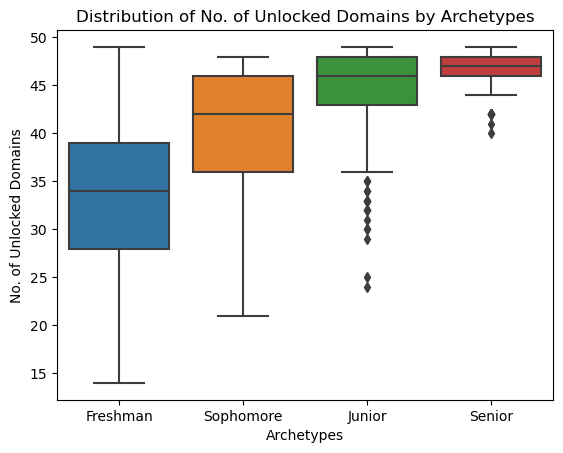

In [1422]:
boxplot = sns.boxplot(x = df_cluster.kmeans, y = df_cluster.unlocked_domains)
boxplot.axes.set_title("Distribution of No. of Unlocked Domains by Archetypes")
boxplot.set_xlabel("Archetypes")
boxplot.set_ylabel("No. of Unlocked Domains")

d_data = {grp:df_cluster['unlocked_domains'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

In [1423]:
df_cluster.groupby(['kmeans'])['unlocked_domains'].describe()

count       mean       std   min   25%   50%   75%   max
kmeans                                                             
Freshman   448.0  33.466518  7.811753  14.0  28.0  34.0  39.0  49.0
Junior     462.0  44.859307  3.839473  24.0  43.0  46.0  48.0  49.0
Senior     101.0  46.732673  1.880910  40.0  46.0  47.0  48.0  49.0
Sophomore  192.0  40.468750  6.186378  21.0  36.0  42.0  46.0  48.0

F-stats: 215.39 p-value: 0.0 significant difference between clusters


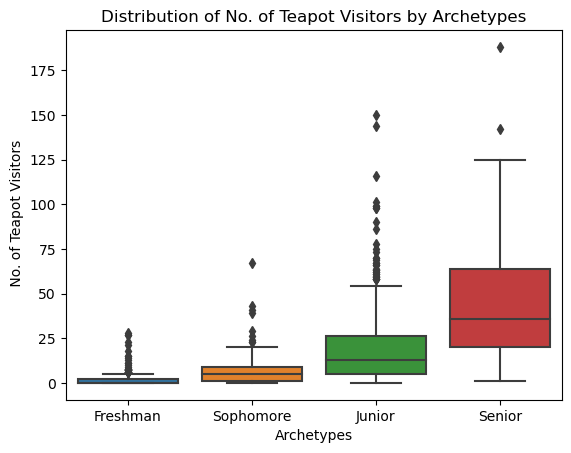

In [1426]:
boxplot = sns.boxplot(x = df_cluster.kmeans, y = df_cluster.teapot_visitors)
boxplot.axes.set_title("Distribution of No. of Teapot Visitors by Archetypes")
boxplot.set_xlabel("Archetypes")
boxplot.set_ylabel(" No. of Teapot Visitors")

d_data = {grp:df_cluster['teapot_visitors'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

In [1427]:
df_cluster.groupby(['kmeans'])['teapot_visitors'].describe()

count       mean        std  min    25%   50%   75%    max
kmeans                                                               
Freshman   448.0   1.584821   3.457242  0.0   0.00   0.0   2.0   28.0
Junior     462.0  19.980519  21.487060  0.0   5.25  13.0  26.0  150.0
Senior     101.0  44.544554  34.512469  1.0  20.00  36.0  64.0  188.0
Sophomore  192.0   6.677083   8.414018  0.0   1.00   5.0   9.0   67.0

F-stats: 5315.48 p-value: 0.0 significant difference between clusters


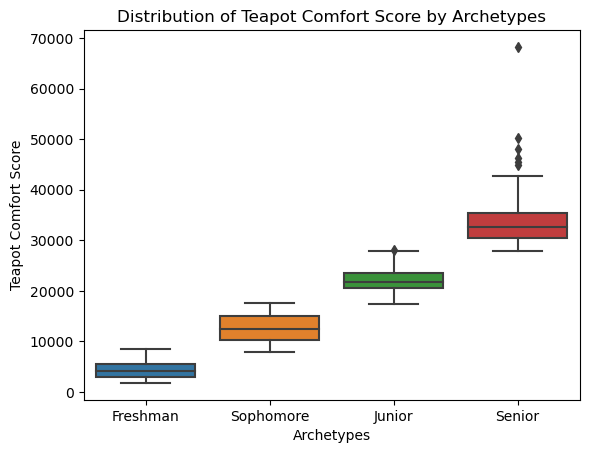

In [1428]:
boxplot = sns.boxplot(x = df_cluster.kmeans, y = df_cluster.teapot_comfort)
boxplot.axes.set_title("Distribution of Teapot Comfort Score by Archetypes")
boxplot.set_xlabel("Archetypes")
boxplot.set_ylabel("Teapot Comfort Score")

d_data = {grp:df_cluster['teapot_comfort'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

In [1429]:
df_cluster.groupby(['kmeans'])['teapot_comfort'].describe()

count          mean          std      min      25%      50%  \
kmeans                                                                   
Freshman   448.0   4365.223214  1725.275958   1800.0   2940.0   4140.0   
Junior     462.0  22159.177489  2240.561736  17450.0  20500.0  21660.0   
Senior     101.0  34047.722772  5772.317192  27950.0  30470.0  32620.0   
Sophomore  192.0  12690.625000  2751.083485   7880.0  10215.0  12545.0   

               75%      max  
kmeans                       
Freshman    5630.0   8550.0  
Junior     23517.5  28060.0  
Senior     35440.0  68240.0  
Sophomore  15035.0  17690.0

F-stats: 631.02 p-value: 0.0 significant difference between clusters


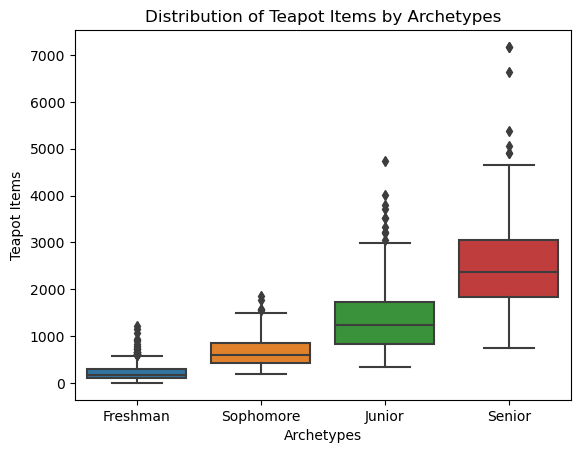

In [1430]:
boxplot = sns.boxplot(x = df_cluster.kmeans, y = df_cluster.teapot_items)
boxplot.axes.set_title("Distribution of Teapot Items by Archetypes")
boxplot.set_xlabel("Archetypes")
boxplot.set_ylabel("Teapot Items")

d_data = {grp:df_cluster['teapot_items'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

In [1431]:
df_cluster.groupby(['kmeans'])['teapot_items'].describe()

count         mean          std    min      25%     50%     75%  \
kmeans                                                                       
Freshman   448.0   225.241071   185.516788    3.0    98.50   174.5   293.0   
Junior     462.0  1346.569264   662.827286  338.0   841.25  1235.5  1725.0   
Senior     101.0  2628.584158  1215.202956  743.0  1832.00  2363.0  3043.0   
Sophomore  192.0   663.609375   317.940425  199.0   424.00   597.5   859.0   

              max  
kmeans             
Freshman   1226.0  
Junior     4735.0  
Senior     7172.0  
Sophomore  1849.0

F-stats: 748.91 p-value: 0.0 significant difference between clusters


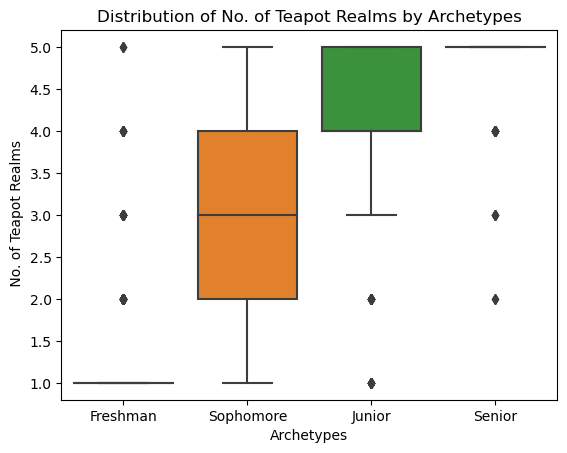

In [1424]:
boxplot = sns.boxplot(x = df_cluster.kmeans, y = df_cluster.teapot_realm)
boxplot.axes.set_title("Distribution of No. of Teapot Realms by Archetypes")
boxplot.set_xlabel("Archetypes")
boxplot.set_ylabel(" No. of Teapot Realms")

d_data = {grp:df_cluster['teapot_realm'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

In [1425]:
df_cluster.groupby(['kmeans'])['teapot_realm'].describe()

count      mean       std  min  25%  50%  75%  max
kmeans                                                       
Freshman   448.0  1.337054  0.750995  1.0  1.0  1.0  1.0  5.0
Junior     462.0  4.069264  0.998680  1.0  4.0  4.0  5.0  5.0
Senior     101.0  4.673267  0.649752  2.0  5.0  5.0  5.0  5.0
Sophomore  192.0  2.906250  1.326951  1.0  2.0  3.0  4.0  5.0

F-stats: 44.46 p-value: 0.0 significant difference between clusters


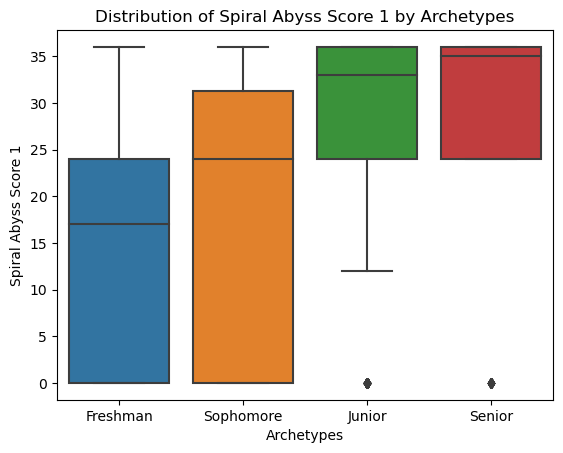

In [1434]:
boxplot = sns.boxplot(x = df_cluster.kmeans, y = df_cluster.abyss_score1)
boxplot.axes.set_title("Distribution of Spiral Abyss Score 1 by Archetypes")
boxplot.set_xlabel("Archetypes")
boxplot.set_ylabel("Spiral Abyss Score 1")

d_data = {grp:df_cluster['abyss_score1'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

In [1435]:
df_cluster.groupby(['kmeans'])['abyss_score1'].describe()

count       mean        std  min   25%   50%    75%   max
kmeans                                                              
Freshman   448.0  15.631696  11.526279  0.0   0.0  17.0  24.00  36.0
Junior     462.0  25.067100  14.283382  0.0  24.0  33.0  36.00  36.0
Senior     101.0  26.009901  14.100706  0.0  24.0  35.0  36.00  36.0
Sophomore  192.0  19.989583  13.663108  0.0   0.0  24.0  31.25  36.0